In [127]:
# pip install signalp-6-package/

In [71]:
# pip install tape-proteins

In [78]:
#HuggingFace Tranformers Package
# pip install transformers

In [1]:
# pip install keras

In [262]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
from scipy.stats import norm
import scipy.stats as sps
import cv2
from scipy.ndimage import convolve
import skimage
from scipy import ndimage
from scipy.spatial.distance import cdist
from nibabel.testing import data_path
import nibabel as nib
from sklearn.mixture import GaussianMixture
import os
import pandas as pd
import skimage.measure
import seaborn as sns
import scipy as sp
import gudhi as gd
import random
import sys
sys.path.append('../') 
from Code.function_geometry import * 
from Code.codegeometry import * 
from PIL import Image
from sklearn.utils import shuffle

In [263]:
import sklearn.preprocessing   as skp
import sklearn.neighbors       as skn
import sklearn.model_selection as skm
import sklearn.decomposition   as skd
import sklearn.manifold        as skf
import sklearn.pipeline        as skl
import sklearn.svm             as sks
import sklearn.ensemble        as ske
import itertools
import tensorflow as tf

import gudhi.clustering.tomato as gdt
import gudhi.representations   as gdr

In [264]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
#tokenizer
from tape import ProteinBertModel, TAPETokenizer
# from tape import UniRepModel, UniRepTokenizer
# from tape import ProteinBertModel, ProteinBertTokenizer
from transformers import AutoTokenizer
from transformers import BertModel, BertTokenizer
# ProtGPT2
# from transformers import pipeline

In [265]:
from keras.models import Sequential
from keras.layers import Conv1D,Conv2D, Dense, Flatten, Dropout,MaxPooling2D
from keras import layers
from keras.layers import MaxPooling1D,MaxPooling2D
from keras.optimizers import SGD, RMSprop
from keras import regularizers

In [393]:
def readFastaFiles(filename):
    sequences = []
    labels = []
    with open(filename, 'r') as file:
        current_id = None
        current_seq = ''
        for line in file:
            if line.startswith('>'):
                if current_id and len(current_seq) > 0 and len(current_seq) <= 201:
                    labels.append(current_id)
                    sequences.append(current_seq.replace('*', '').replace('\n', ''))
                current_id = line
                current_seq = ''
            else:
                current_seq += line
        # Add the last sequence
        if current_id and len(current_seq) > 0 and len(current_seq) <= 201:
            labels.append(current_id)
            sequences.append(current_seq.replace('*', '').replace('\n', ''))
    return labels,sequences

In [387]:
def createFaster(filename,labels,sequences):
    with open(filename, 'w') as f:
        # Write content to the file
        for i in range(len(sequences)):
        # for i in range(5):
            f.write(labels[i])
            f.write(sequences[i]+"\n")

In [268]:
# def resultSignalP(filename):
#     f=open(filename,'r')
#     result=[]
#     next(f)
#     next(f)
#     for line in f.readlines():
#         data = line.rstrip()  
#         index = data.__contains__('SP')
#         #Can we return the probabilty of SP and other
#         if index == True: 
#             split = data.split()
#             result.append(float(split[split.index("SP")+2]))
#         else:
#             result.append(0)
#     f.close()
#     return result  

In [269]:
#Creating a file of all signalP sequences
#getting supposed signalprotein
def signalProtein(filename,resultSignalp,sequences,labels):
    new_label = []
    new_sequence = []
    i = 0
    with open(filename, 'w') as f:
        for r in result_signalp:
            if r > 0 and r < 0.7:
                new_label.append(0)
            elif r > 0.7:
                new_label.append(1)
            if r > 0:
                f.write(labels[i]+"\n")
                f.write(sequences[i]+"\n")
                new_sequence.append(sequences[i])
            i+=1
    return new_label,new_sequence         

In [270]:
def resultSignalP(filename):
    f=open(filename,'r')
    result=[]
    next(f)
    next(f)
    for line in f.readlines():
        data = line.rstrip()  
        index = data.__contains__('SP')
        #Can we return the probabilty of SP and other
        if index == True: 
            result.append(1)
        else:
            result.append(0)
    f.close()
    return result  

In [271]:
def geotop_analysis(data):
    # U_train = U_train_b + U_train_m + U_test_b + U_test_m
    n = 100
    i = 0
    dgms_tda = []
    dgms_per_var = []
    dgms_per_linalg = []
    for U in data:
        print(i)
        L = np.linspace(np.min(U), np.max(U),  n)[::-1]
        #per = np.zeros(n)
        #area = np.zeros(n)
        #euler = np.zeros(n)
        #for t in range(len(L)):
         #   per[t] = Perimetre_Hermine(U, L[t])
          #  area[t] = Area(U, L[t])
           # euler[t] = Euler(U >= L[t])
        life, barecode, persistence, connected_comp, Per_total, Area_total, euler_total, per, area, euler = function_persistance(U, L, False)
        diagram_pondere_total_vari = np.zeros((len(life), 2))
        diagram_pondere_linalg = np.zeros((len(life), 2))
        diagram = np.zeros((len(life), 2))
        k = 0
        idx_keys = list(life.keys())
        for idx in idx_keys[1:]:
            diagram_pondere_total_vari[k][0] = (np.sum(per[idx]))*life[idx][1]
            diagram_pondere_total_vari[k][1] = (np.sum(per[idx]))*life[idx][0]
            diagram_pondere_linalg[k][0] = (np.linalg.norm(per[idx]))*life[idx][1]
            diagram_pondere_linalg[k][1] = (np.linalg.norm(per[idx]))*life[idx][0]
            diagram[0] = life[idx][1]
            diagram[1] = life[idx][0]
            k=k+1
        dgms_tda.append(diagram)
        dgms_per_linalg.append(diagram_pondere_linalg)
        dgms_per_var.append(diagram_pondere_total_vari)
        i=i+1
    return dgms_per_linalg

In [345]:
def concate_embedding_geotop(embedding,dgms,dim):
    long = embedding.shape[1]
    res = []
    i = 0
    for array in dgms:
        flat = array.flatten()
        #flatten and concatenate the rest withe the remainning zeroes
        t = dim - (long + flat.shape[0])
        res.append(np.concatenate((np.concatenate((embedding[i], flat)), np.zeros(t))))
        i +=1
    return res

In [499]:
def model_trainning_saving(shape,epoch,model_name,train_data,train_labels,test_data,test_labels):
    model = Sequential()

    model.add(Conv2D(filters=8, kernel_size=(3, 3), padding="same",activation='relu', input_shape=(shape[0],shape[1],1)))
    model.add(layers.AveragePooling2D())
    
    model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same",activation='relu'))
    model.add(layers.AveragePooling2D())
    
    model.add(layers.Conv2D(filters=32, kernel_size=(3, 3),padding="same", activation='relu'))
    model.add(layers.AveragePooling2D())
    
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(units=128, activation='relu',kernel_regularizer=regularizers.l2(1e-4),bias_regularizer=regularizers.l2(1e-4), activity_regularizer=regularizers.l2(1e-5)))
    
    model.add(layers.Dense(units=64, activation='relu',kernel_regularizer=regularizers.l2(1e-4),bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5)))
    
    model.add(layers.Dense(units=1, activation = 'sigmoid',kernel_regularizer=regularizers.l2(1e-4),bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5)))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    print(model.summary())

    #trainning
    history = model.fit(x=train_data, y=train_labels,epochs=epoch,shuffle=True,validation_data=(test_data, test_labels),verbose=1,batch_size=64)
  
    
    # Plot history: MAE
    import matplotlib.pyplot as plt
    plt.plot(history.history['accuracy'], label='training data')
    plt.plot(history.history['val_accuracy'], label='validation data')
    #plt.title('')
    plt.ylabel('Accuracy')
    plt.xlabel('No. epoch')
    plt.legend(loc="lower right")
    plt.show()
      # save model and its architecture 
    model.save(model_name+'.h5')
    model.save(model_name+'.keras')
    # load model 
    # model = load_model('model.h5')
    
    # # check model info 
    # model.summary()

In [394]:
def concate_embedding_geotop(embedding,dgms,dim):
    # len_data = max(array.shape[0] for array in dgms)
    long = embedding.shape[1]
    res = []
    i = 0
    for array in dgms:
        flat = array.flatten()
        #flatten and concatenate the rest with zeroes
        t = dim - (long + flat.shape[0])
        res.append(np.concatenate((np.concatenate([embedding[i], flat]), np.zeros(t))))
        i +=1
    return res

In [275]:
def concat_embedding_geotop(dgms,dim):
    # len_data = max(array.shape[0] for array in dgms)
    res = []
    for array in dgms:
        flat = array.flatten()
        #flatten and concatenate the rest with zeroes
        t = dim - flat.shape[0]
        res.append(np.concatenate([flat, np.zeros(t)]))
    return res

In [276]:
# create a fasta file with the selected protein

In [398]:
label,sequence=readFastaFiles("Arabidopsis_thaliana_new.fa")  # change to your own path

In [400]:
len(sequence)

10353

In [425]:
label,sequence=readFastaFiles("arabidopsis.fasta")  # change to your own path

In [426]:
len(sequence)

10353

In [427]:
len(label)

10353

## Data Manipulation

In [399]:
#Creating fasta file with protein <=200
createFaster("arabidopsis.fasta",label,sequence)

### Getting the labels from signalP

In [299]:
!signalp6 --fastafile .\arabidopsis.fasta --organism eukarya --output_dir arabidopsis --format txt --mode fast


Predicting: 100%|##########| 10353/10353 [1:59:34<00:00,  1.44sequences/s]

Writing files: 100%|##########| 10353/10353 [00:33<00:00, 309.86it/s]
multiprocessing.pool.RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\multiprocessing\pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\multiprocessing\pool.py", line 51, in starmapstar
    return list(itertools.starmap(args[0], args[1]))
  File "C:\Users\Kelly Larissa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\signalp\make_sequence_plot.py", line 202, in make_plots_one_sample
    make_sequence_txt_output(identifier, aa_sequence,viterbi_path,marginal_probs, kingdom, txt_path)
  File "C:\Users\Kelly Larissa\AppData\Local

In [679]:
result_signalp = resultSignalP("arabidopsis/prediction_results.txt")

In [680]:
result_signalp = result_signalp[:-1]

In [526]:
unique, counts = np.unique(result_signalp, return_counts=True)

In [527]:
unique, counts = np.unique(result_signalp, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 8808]
 [   1 1544]]


In [528]:
new_label = resultSignalP("arabidopsis/prediction_results.txt")

In [529]:
len(new_label)

10353

### Embedding using TAPE

In [452]:
#Learning the representation of protein
model_tape = ProteinBertModel.from_pretrained('bert-base')
tokenizer_tape = TAPETokenizer(vocab='iupac')

In [95]:
# new_label,new_sequence

In [ ]:
num_of_features = 768
embedded=np.zeros((len(new_label),num_of_features))
y=np.zeros(len(new_label))

i=0
for s in sequence:
    #tape
    print(i)
    token_ids = torch.tensor([tokenizer_tape.encode(s)])
    output = model_tape(token_ids)
    sequence_output = output[0]
    embedded[i]= np.array(np.mean(sequence_output.detach().numpy(),axis=1) )
    i=i+1

In [ ]:
embedded.shape

In [307]:
# Save the array to a file
# np.save('arabidopsis_tape.npy', embedded)

# # Later, to reload the array
embedded = np.load('arabidopsis_tape.npy')

### Embedding using ESM

In [49]:
protein_data = [("protein_" + str(i), s) for i, s in enumerate(sequence)]

In [56]:
#embedding 2
import torch
import esm

# Load ESM-2 model
model, alphabet = esm.pretrained.esm2_t33_650M_UR50D()
batch_converter = alphabet.get_batch_converter()
model.eval()  # disables dropout for deterministic results

# Define a function to compute the average embedding
def get_average_embedding(sequence):
    batch_labels, batch_strs, batch_tokens = batch_converter(sequence)
    batch_lens = (batch_tokens != alphabet.padding_idx).sum(1)
    # Get the embeddings
    with torch.no_grad():
        results = model(batch_tokens, repr_layers=[33], return_contacts=True)
    # Compute the average embedding
    avg_embedding = torch.mean(results["representations"][33], dim=1)  # Assuming layer 33 for representation
    return avg_embedding
# embedding2 = get_average_embedding(protein_data)
# print(embedding2)

In [62]:
#next time, do  in batcg=h of 1000
embedding2 = []
i = 0
for s in protein_data:
    print(i)
    embedding2.append(get_average_embedding([s]))
    i+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [308]:
# embedding2

In [314]:
# Save the tensor to a file
# torch.save(embedding2, 'arabidopsis_esm.pt')

# Load the tensor from the file
embedding2 = torch.load('arabidopsis_esm.pt')

In [315]:
# Convert each tensor to a NumPy array
numpy_array_list = [tensor.numpy() for tensor in embedding2]

# Convert the list of arrays to a single NumPy array
numpy_array = np.array(numpy_array_list)

In [316]:
numpy_array = numpy_array.reshape(numpy_array.shape[0],numpy_array.shape[2])

In [317]:
numpy_array.shape

(10353, 1280)

### Converting embedding to image

In [320]:
embedding_padded = np.concatenate((embedded, np.zeros((embedded.shape[0],16))), axis=1)
embedding2_padded = np.concatenate((numpy_array, np.zeros((numpy_array.shape[0],16))), axis=1)

In [310]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(embedding_padded)
embedding_normalized = std_scale.transform(embedding_padded)

In [321]:
std_scale = preprocessing.StandardScaler().fit(embedding2_padded)
embedding2_normalized = std_scale.transform(embedding2_padded)

In [322]:
embedding_normalized.shape

(10352, 784)

In [312]:
#first image
shape_unit=28
embedding_images=np.reshape(embedding_normalized,(embedding_normalized.shape[0],shape_unit,shape_unit))

print(embedding_images.shape)

(10352, 28, 28)


In [633]:
#first image
shape_unit=36
embedding2_images=np.reshape(embedding2_normalized,(embedding2_normalized.shape[0],shape_unit,shape_unit))

print(embedding_images.shape)

(10352, 28, 28)


### Getting the geometrical representation of each embedded image

In [313]:
#apply geotop to the first image embedding
#28*28
embedding_geotop = geotop_analysis(embedding_images)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [634]:
36*36
embedding2_geotop = geotop_analysis(embedding2_images)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [324]:
np.savez("arabidopsis_tape_geotop.npz", *embedding_geotop)

In [635]:
np.savez("arabidopsis_esm_geotop.npz", *embedding2_geotop)

In [386]:
# # Load list of NumPy arrays from file
loaded_arrays = np.load("embedding_geotop.npz")

# # Access individual arrays using their keys
# array1 = loaded_arrays['arr_0']
# array2 = loaded_arrays['arr_1']

In [117]:
embedded.shape

(12337, 768)

In [390]:
embedding_geotop = [loaded_arrays['arr_'+str(i)] for i in range(len(loaded_arrays))]

In [ ]:
##store embedding topo
# embedding_geotop
# embedding2_geotop

## Trainning

### TAPE and Geotop

In [690]:
dgms = gdr.DiagramSelector(use=True, point_type='finite').fit_transform(embedding_geotop)

In [691]:
len(dgms)

10352

In [692]:
dim = 1024
result = concate_embedding_geotop(embedded,dgms,dim)

In [693]:
#to be verify
# shape_unit=32
# tape_geotope_result = np.reshape(result,(X_normalized.shape[0],shape_unit,shape_unit))

In [694]:
len(result)

10352

In [695]:
tape_geotope_result = result.copy()

In [534]:
#splitting the dataset
num_samples = len(result)
num_train_samples = int(0.8 * num_samples)  # 80% for training, 20% for testing

# Split data and labels into training and testing sets
train_data, test_data = result[:num_train_samples], result[num_train_samples:]
train_labels, test_labels = result_signalp[:num_train_samples], result_signalp[num_train_samples:]

In [535]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [536]:
shape_unit=32
std_scale = preprocessing.StandardScaler().fit(train_data)
X_normalized = std_scale.transform(train_data)
train_data=np.reshape(X_normalized,(X_normalized.shape[0],shape_unit,shape_unit))

In [537]:
std_scale = preprocessing.StandardScaler().fit(test_data)
X_normalized = std_scale.transform(test_data)
test_data=np.reshape(X_normalized,(X_normalized.shape[0],shape_unit,shape_unit))

In [538]:
test_data[0].shape

(32, 32)

In [539]:
train_data = np.expand_dims(train_data, -1)
test_data = np.expand_dims(test_data, -1)

In [540]:
train_data[0].shape

(32, 32, 1)

In [541]:
unique, counts = np.unique(test_labels, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 1751]
 [   1  320]]


In [542]:
test_labels.shape

(2071,)

In [543]:
test_data.shape

(2071, 32, 32, 1)

In [544]:
train_data.shape

(8281, 32, 32, 1)

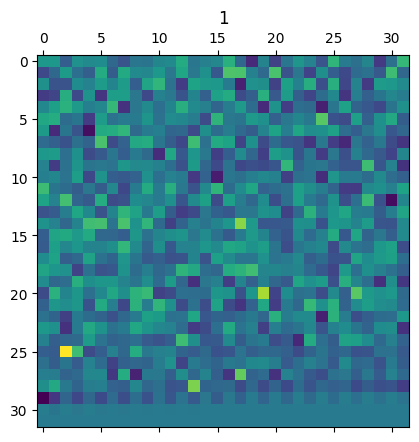

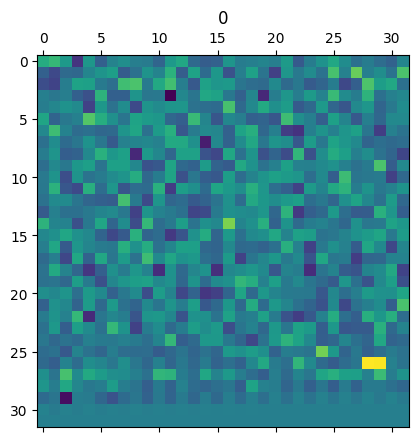

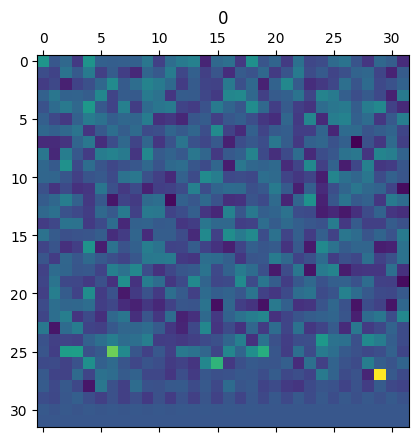

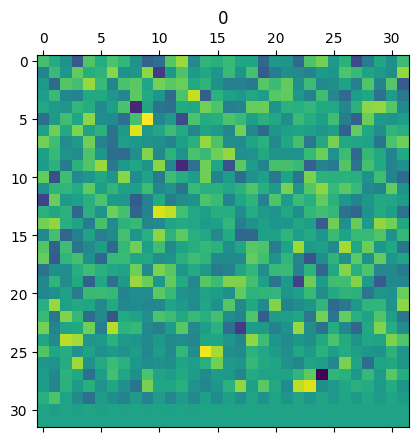

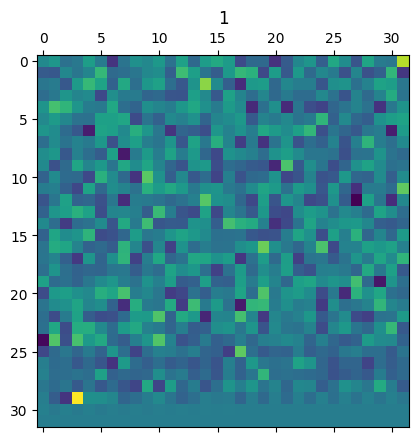

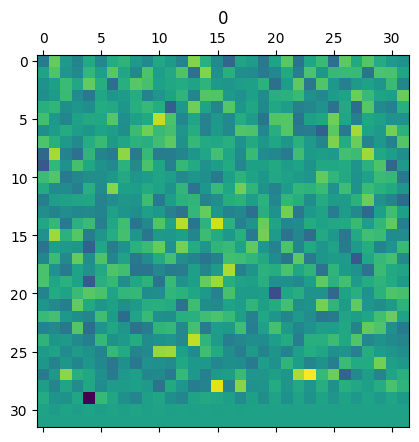

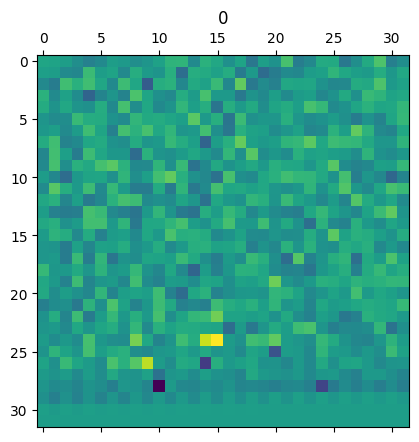

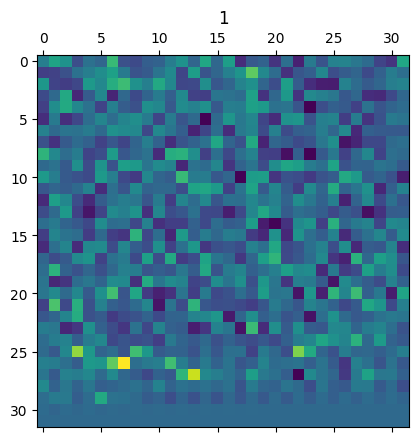

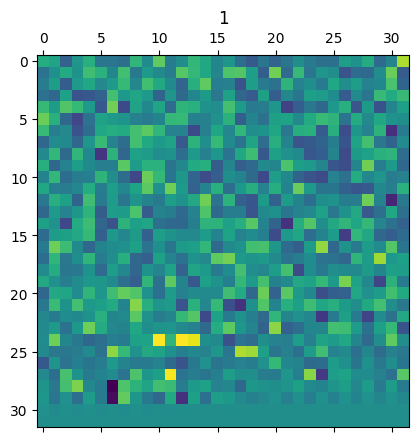

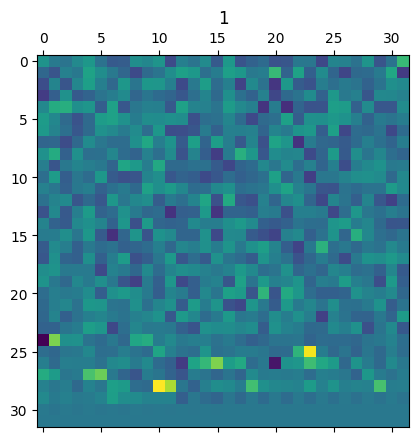

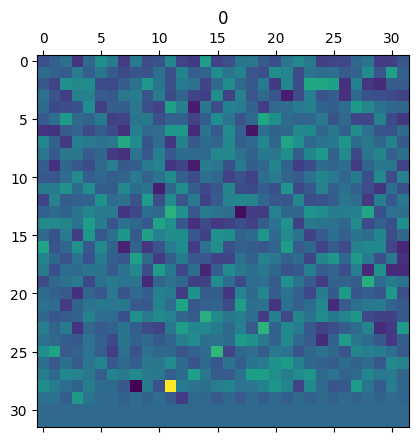

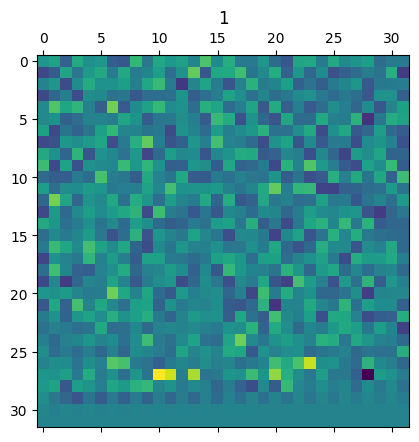

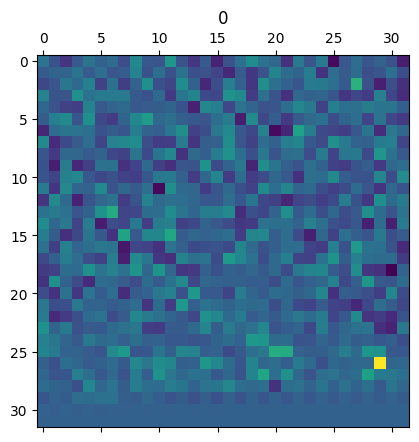

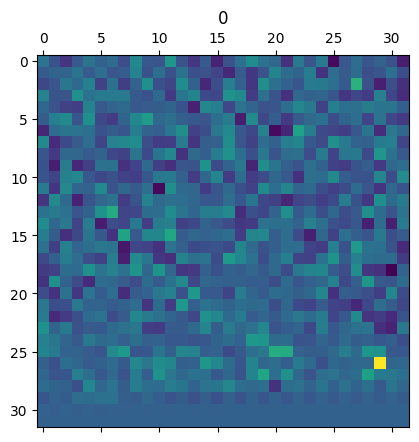

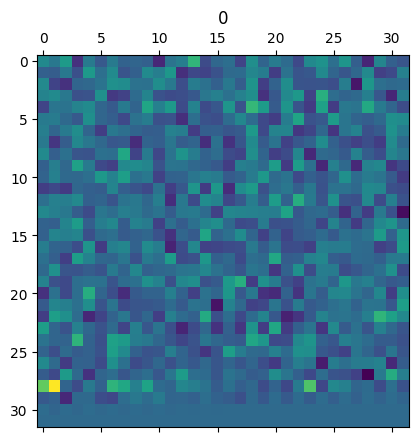

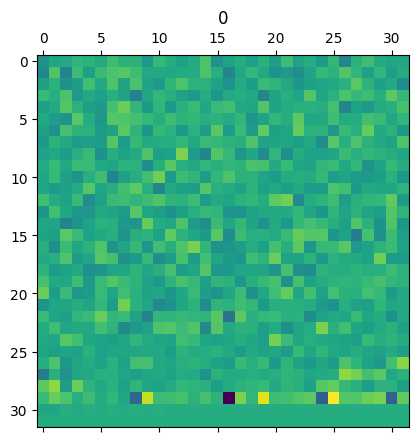

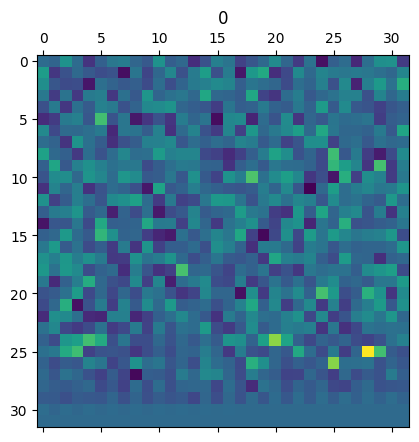

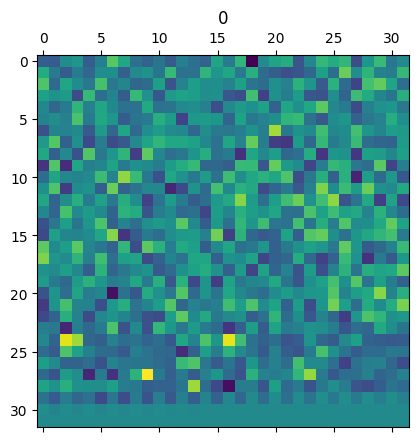

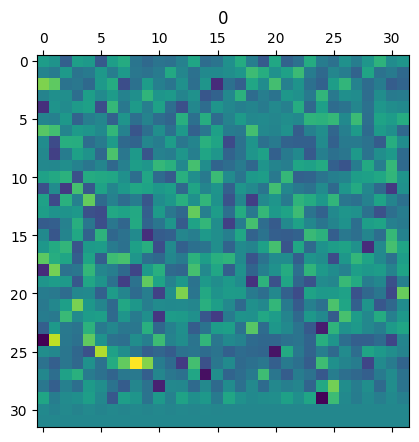

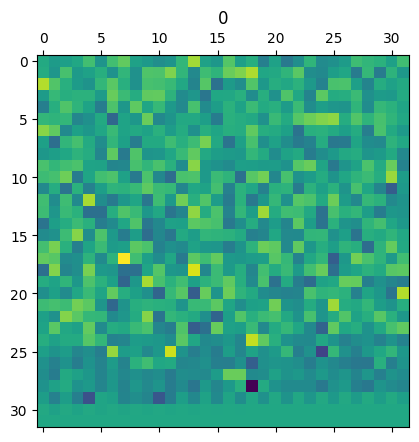

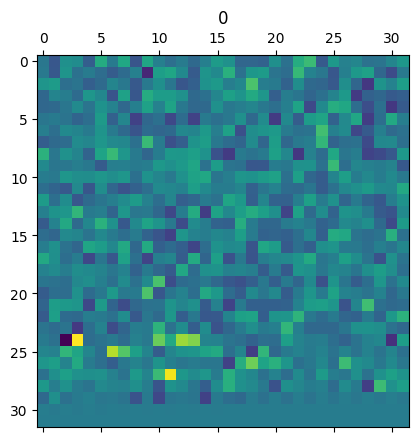

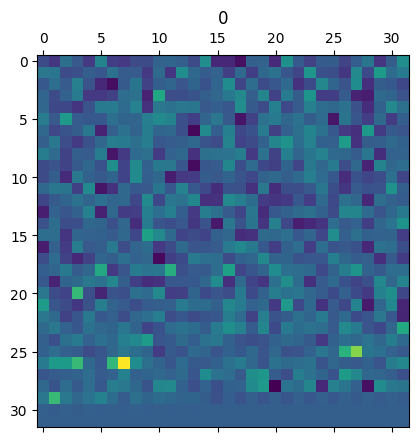

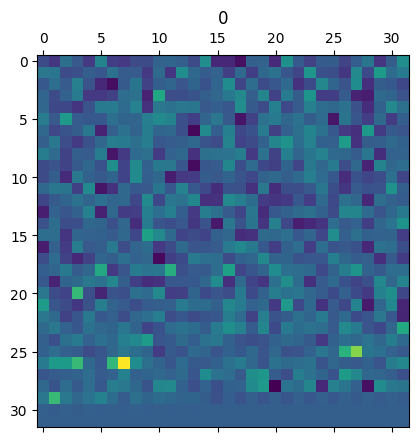

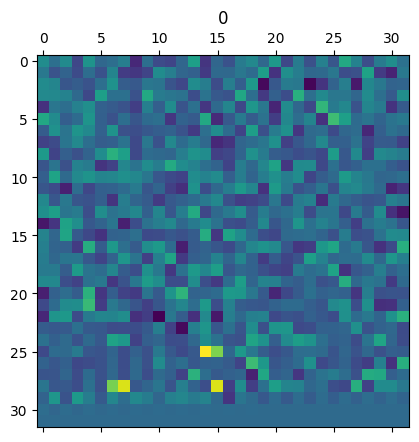

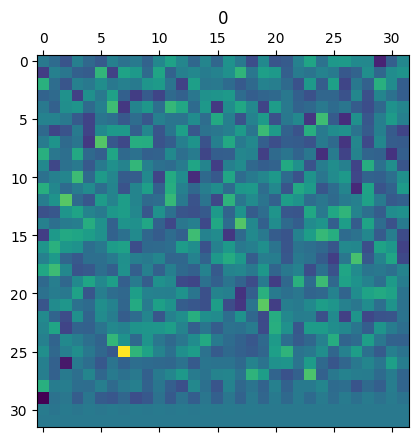

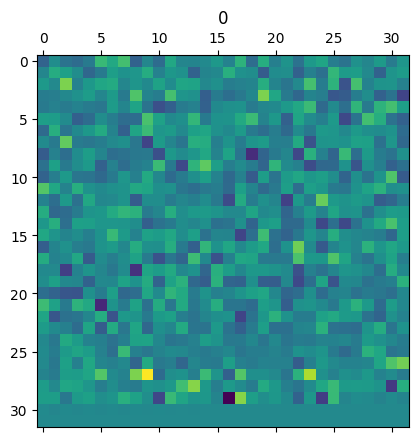

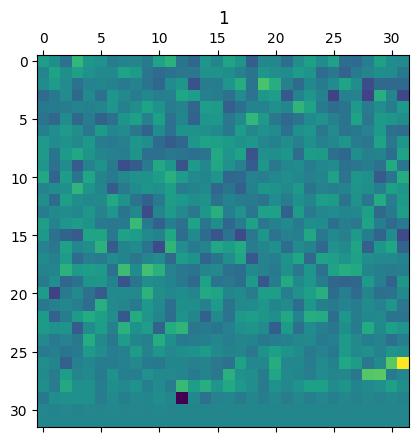

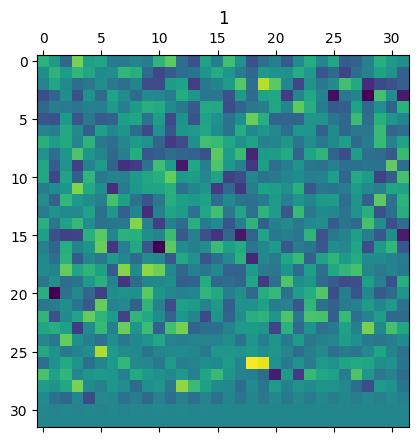

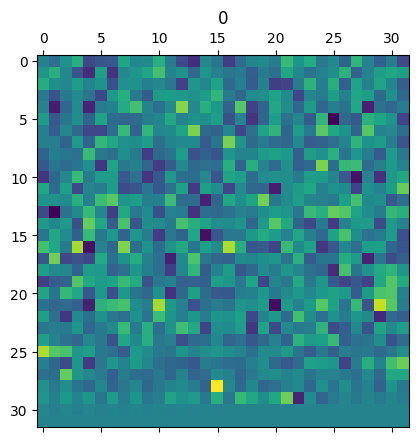

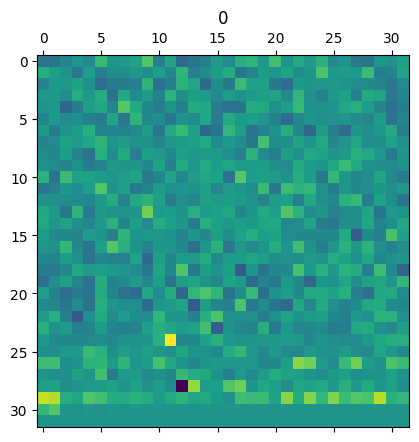

In [545]:
for i in range(30):
    plt.matshow(train_data[i])
    plt.title(train_labels[i])
    plt.show()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 8)         80        
                                                                 
 average_pooling2d_30 (Aver  (None, 16, 16, 8)         0         
 agePooling2D)                                                   
                                                                 
 conv2d_31 (Conv2D)          (None, 16, 16, 16)        1168      
                                                                 
 average_pooling2d_31 (Aver  (None, 8, 8, 16)          0         
 agePooling2D)                                                   
                                                                 
 conv2d_32 (Conv2D)          (None, 8, 8, 32)          4640      
                                                                 
 average_pooling2d_32 (Aver  (None, 4, 4, 32)        

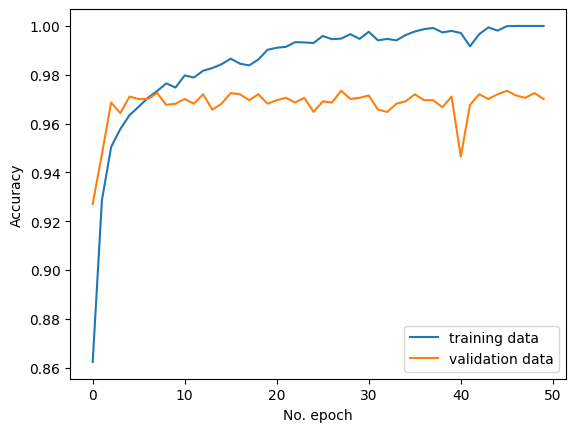

C:\Users\Kelly Larissa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [546]:
 model_trainning_saving([32,32],50,"arabidopsis_tape_model",train_data,train_labels,test_data,test_labels)

In [586]:
result_signalp[0:11]

[1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0]

In [627]:
toto = result[1].reshape(1,32,32)

In [628]:
toto.shape

(1, 32, 32)

In [629]:
from keras.models import load_model
mod = load_model('arabidopsis_tape_model.keras')
predictions_tape = mod.predict(toto)

1/1 [==============================] - 0s 205ms/step


In [630]:
predictions_tape

array([[0.]], dtype=float32)

In [631]:
predictions_tape[0][0]

0.0

In [632]:
format(predictions_tape[0][0], '.5f')

'0.00000'

### ESM and Geotop

In [659]:
dgms = gdr.DiagramSelector(use=True, point_type='finite').fit_transform(embedding2_geotop)

In [660]:
dim = 1681
result = concate_embedding_geotop(numpy_array,dgms,dim)

In [661]:
#splitting the dataset
num_samples = len(result)
num_train_samples = int(0.8 * num_samples)  # 80% for training, 20% for testing

# Split data and labels into training and testing sets
train_data, test_data = result[:num_train_samples], result[num_train_samples:]
train_labels, test_labels = result_signalp[:num_train_samples], result_signalp[num_train_samples:]

In [662]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [663]:
shape_unit=41
std_scale = preprocessing.StandardScaler().fit(train_data)
X_normalized = std_scale.transform(train_data)
train_data=np.reshape(X_normalized,(X_normalized.shape[0],shape_unit,shape_unit))

In [664]:
std_scale = preprocessing.StandardScaler().fit(test_data)
X_normalized = std_scale.transform(test_data)
test_data=np.reshape(X_normalized,(X_normalized.shape[0],shape_unit,shape_unit))

In [665]:
train_data = np.expand_dims(train_data, -1)
test_data = np.expand_dims(test_data, -1)

In [666]:
unique, counts = np.unique(train_labels, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 7058]
 [   1 1224]]


In [667]:
train_data.shape

(8282, 41, 41, 1)

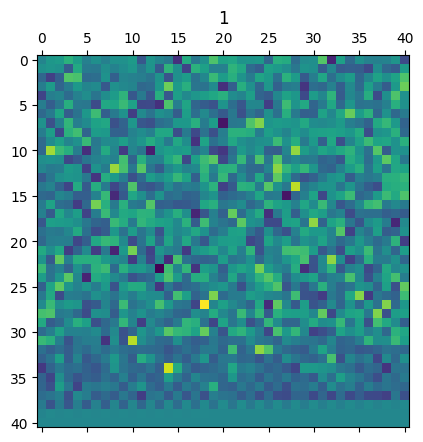

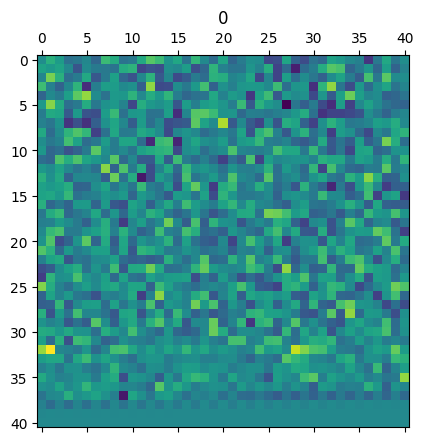

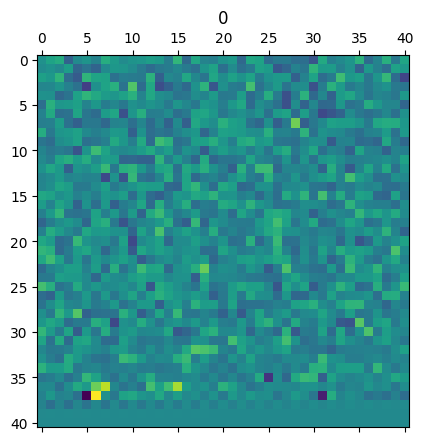

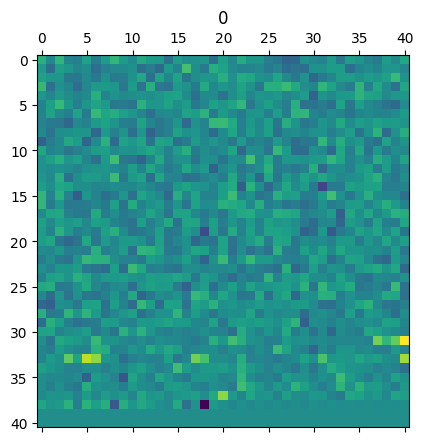

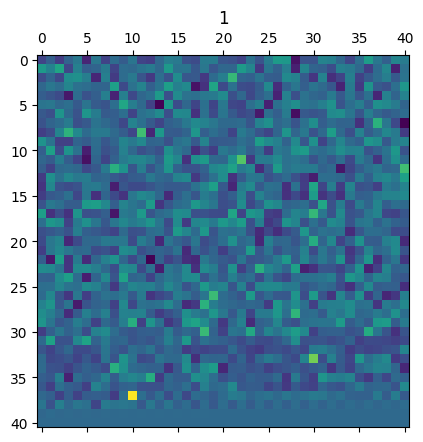

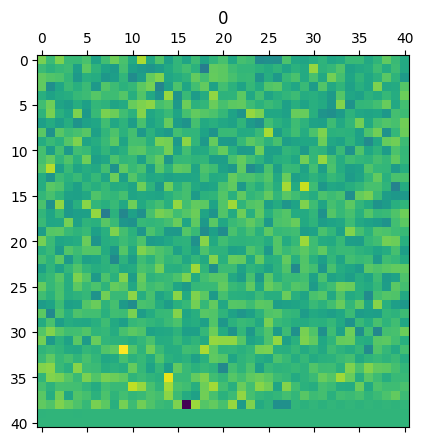

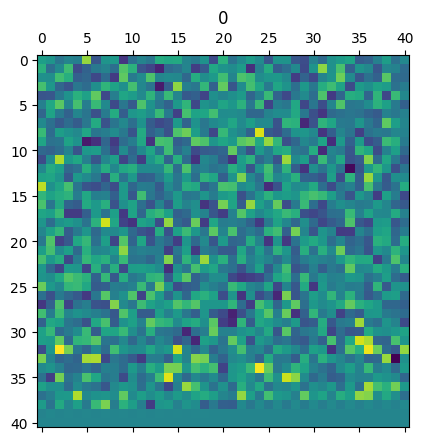

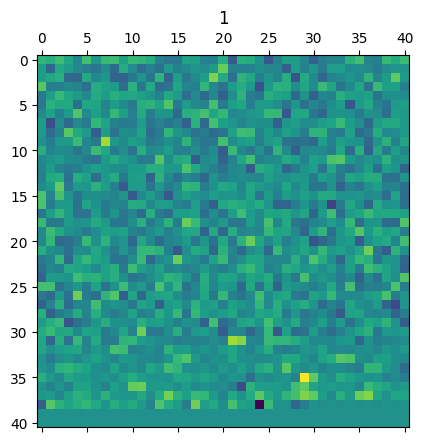

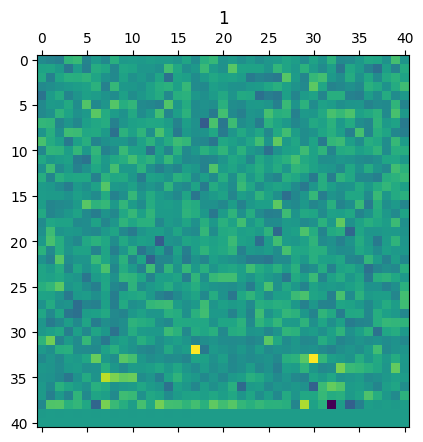

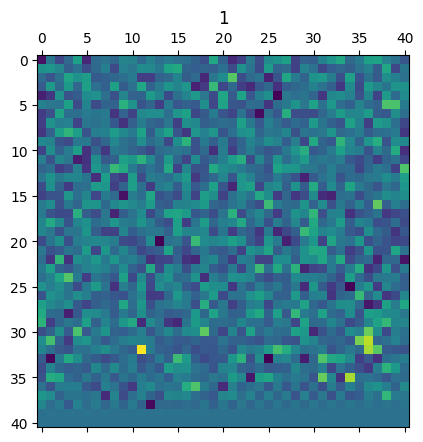

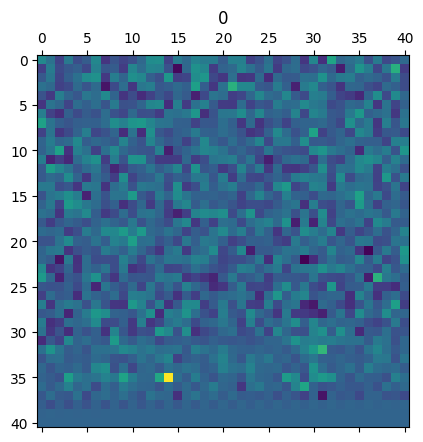

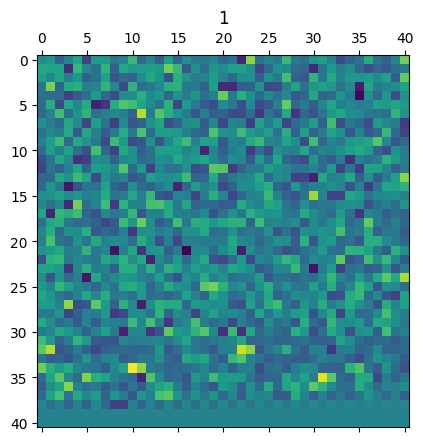

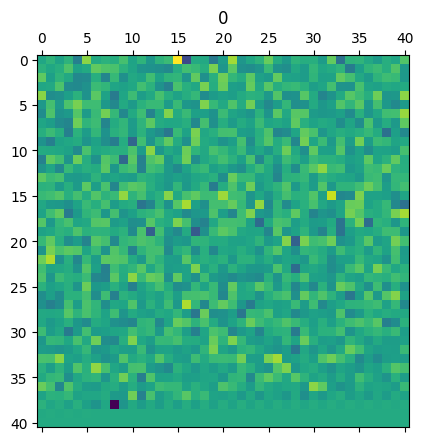

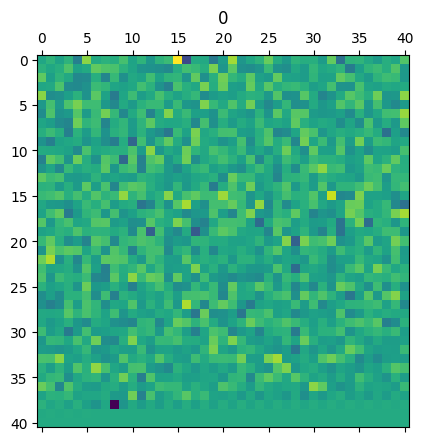

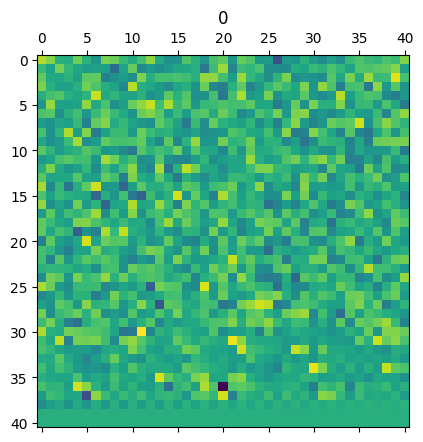

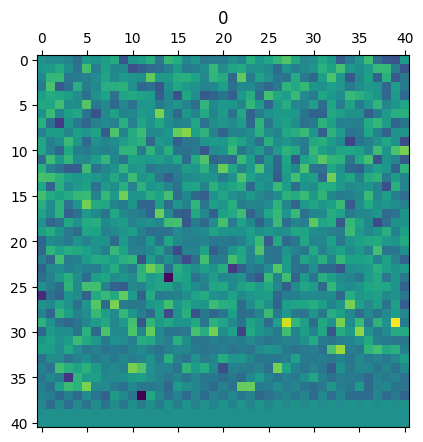

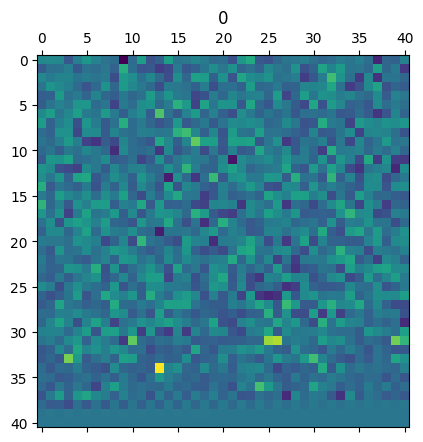

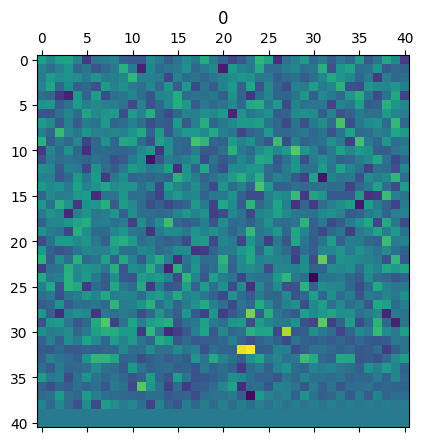

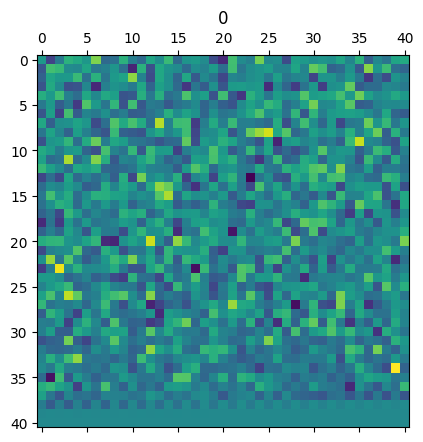

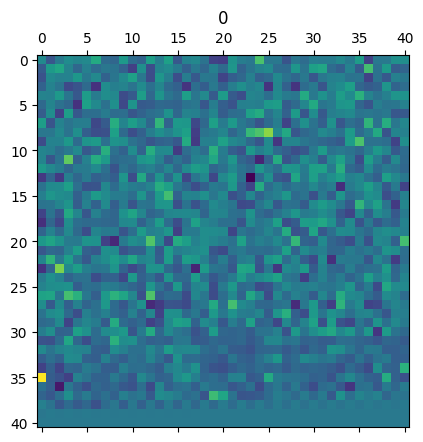

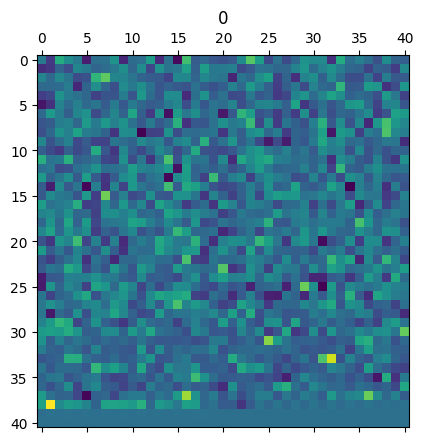

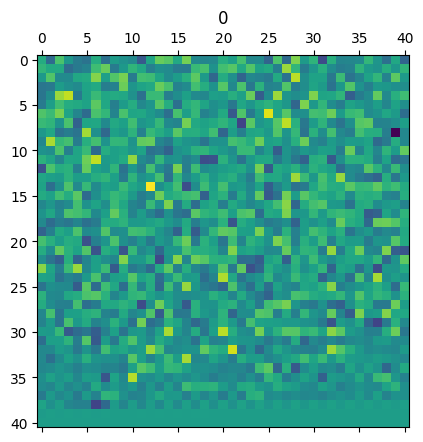

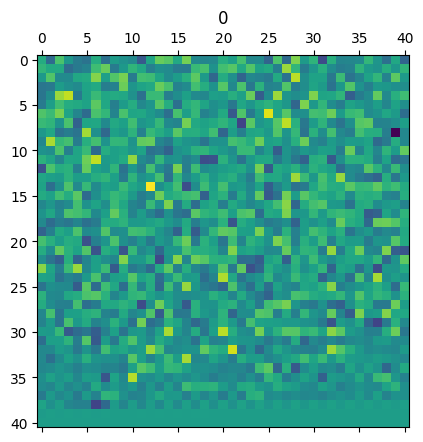

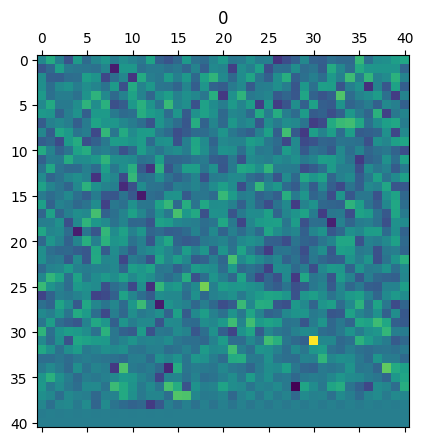

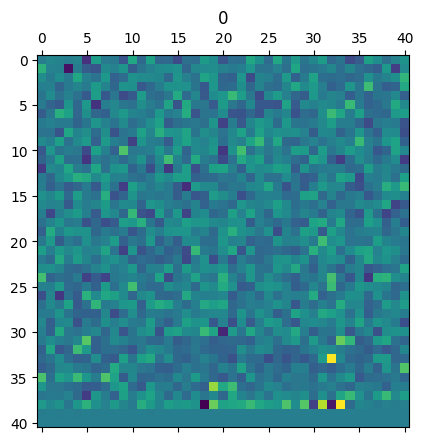

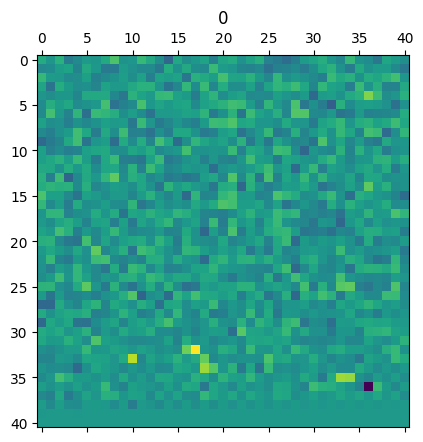

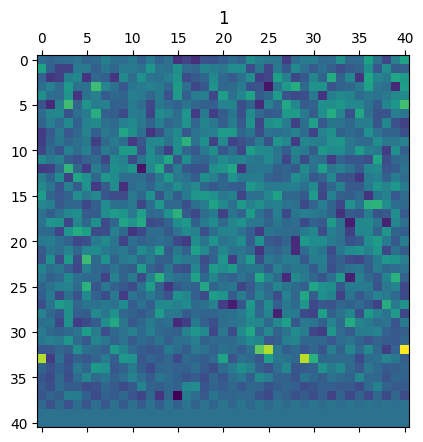

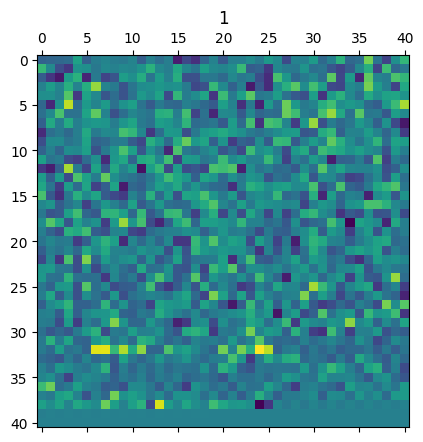

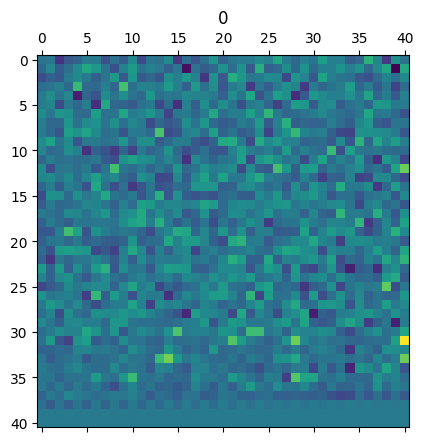

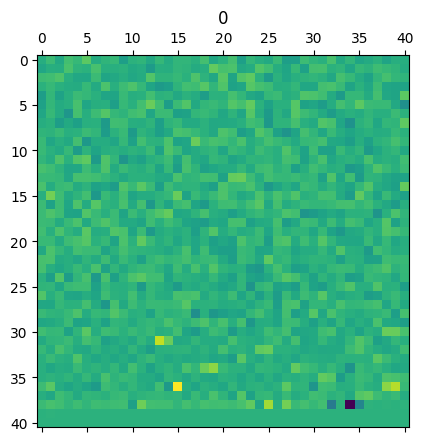

In [668]:
for i in range(30):
    plt.matshow(train_data[i])
    plt.title(train_labels[i])
    plt.show()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 41, 41, 8)         80        
                                                                 
 average_pooling2d_36 (Aver  (None, 20, 20, 8)         0         
 agePooling2D)                                                   
                                                                 
 conv2d_37 (Conv2D)          (None, 20, 20, 16)        1168      
                                                                 
 average_pooling2d_37 (Aver  (None, 10, 10, 16)        0         
 agePooling2D)                                                   
                                                                 
 conv2d_38 (Conv2D)          (None, 10, 10, 32)        4640      
                                                                 
 average_pooling2d_38 (Aver  (None, 5, 5, 32)        

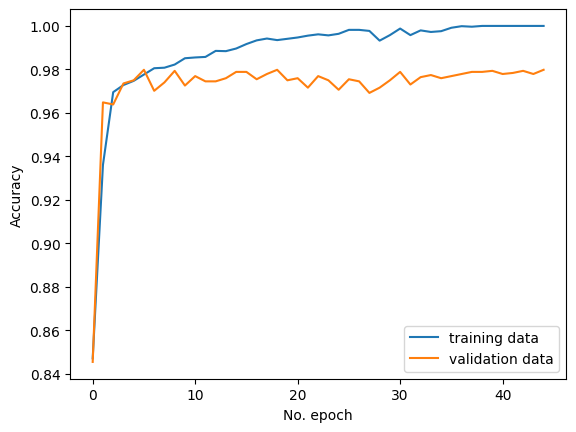

C:\Users\Kelly Larissa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [669]:
 model_trainning_saving([41,41],45,"esm_model_arabidopsis",train_data,train_labels,test_data,test_labels)

### TAPE

In [476]:
result = np.concatenate((embedded, np.zeros((embedded.shape[0],16))), axis=1)

In [477]:
#splitting the dataset
num_samples = len(result)
num_train_samples = int(0.8 * num_samples)  # 80% for training, 20% for testing

# Split data and labels into training and testing sets
train_data, test_data = result[:num_train_samples], result[num_train_samples:]
train_labels, test_labels = result_signalp[:num_train_samples], result_signalp[num_train_samples:]

In [478]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [479]:
shape_unit=28
std_scale = preprocessing.StandardScaler().fit(train_data)
X_normalized = std_scale.transform(train_data)
train_data=np.reshape(X_normalized,(X_normalized.shape[0],shape_unit,shape_unit))

In [480]:
std_scale = preprocessing.StandardScaler().fit(test_data)
X_normalized = std_scale.transform(test_data)
test_data=np.reshape(X_normalized,(X_normalized.shape[0],shape_unit,shape_unit))

In [481]:
train_data = np.expand_dims(train_data, -1)
test_data = np.expand_dims(test_data, -1)

In [471]:
unique, counts = np.unique(train_labels, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 9287]
 [   1  582]]


In [482]:
train_data.shape

(9869, 28, 28, 1)

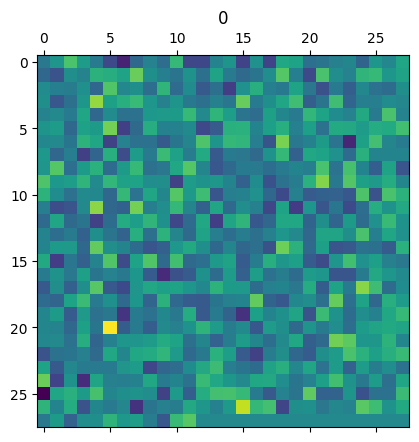

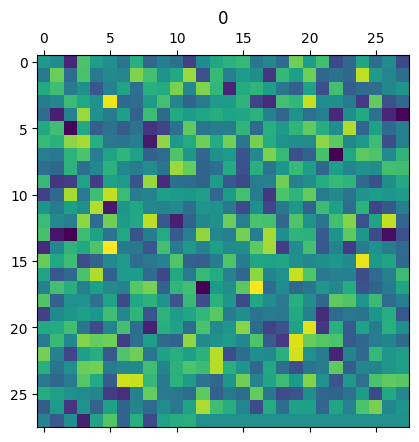

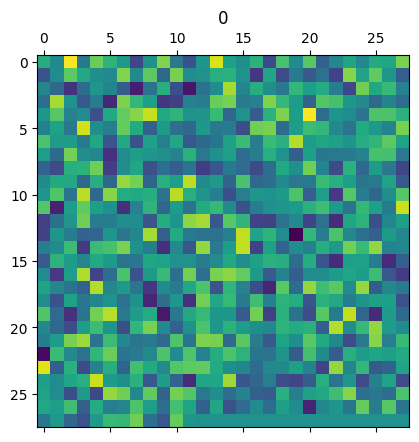

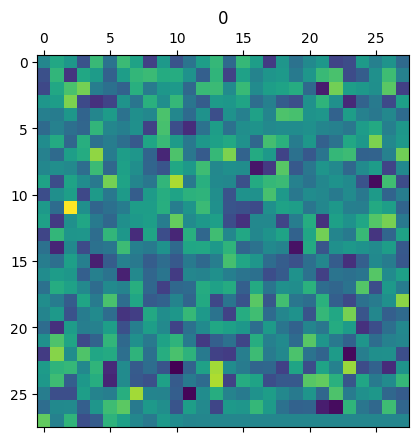

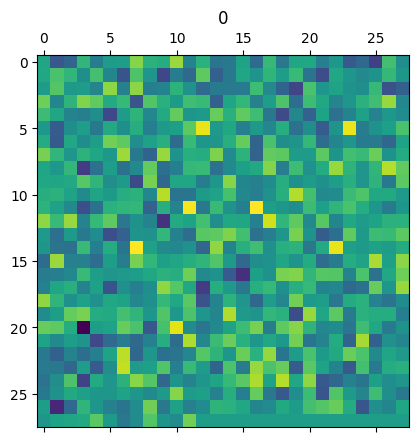

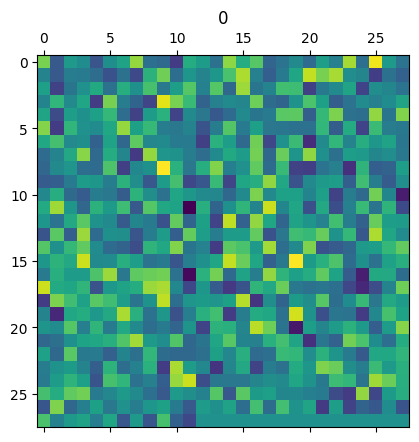

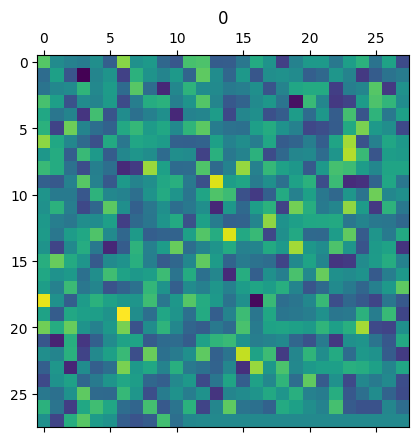

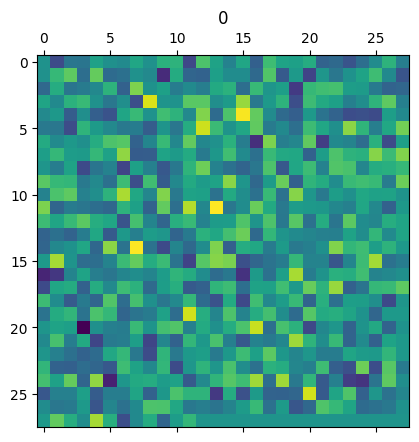

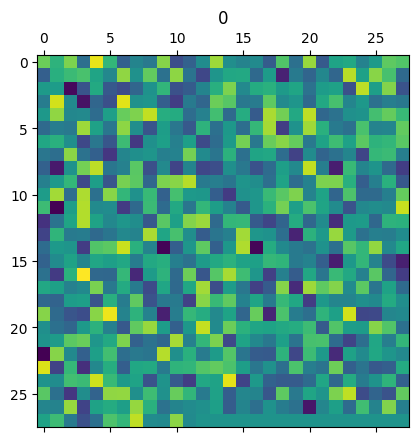

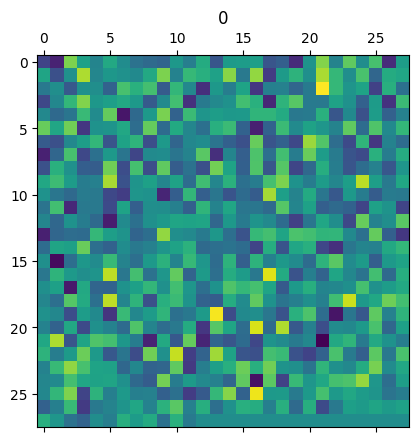

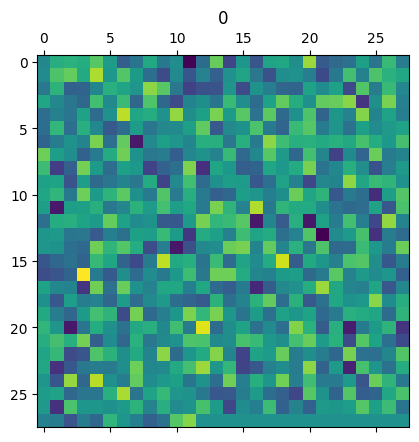

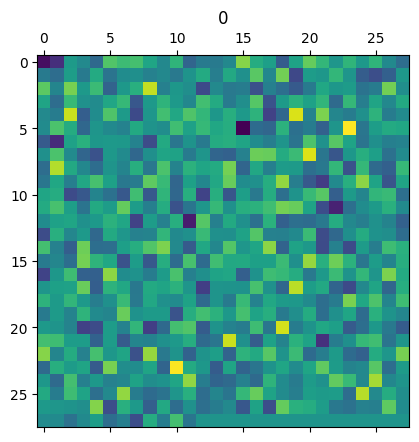

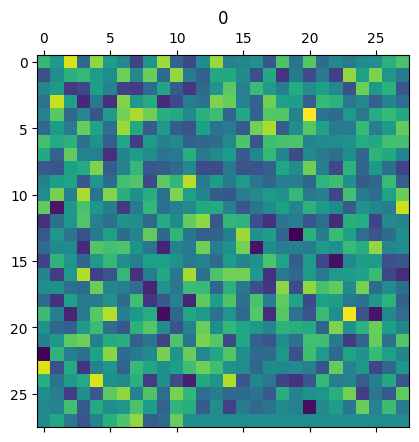

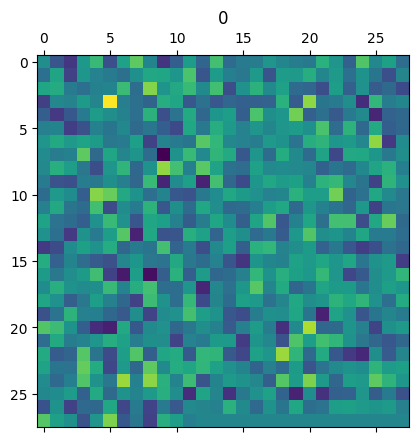

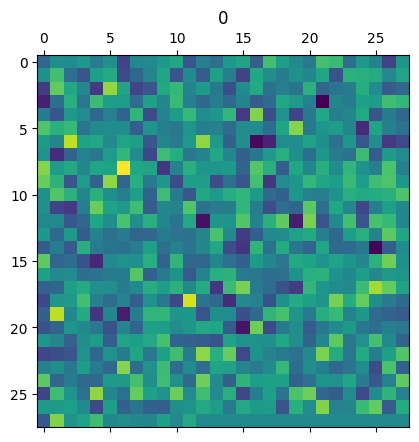

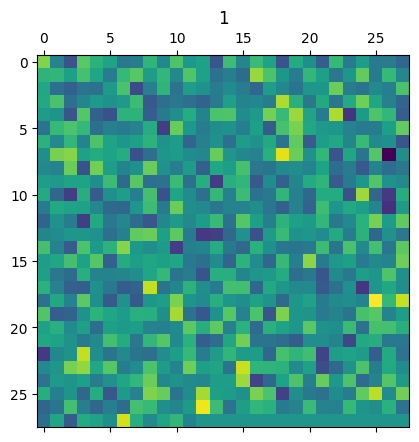

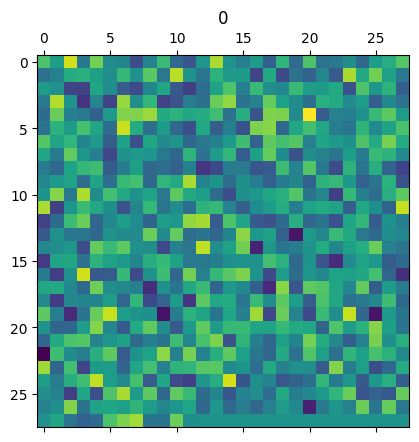

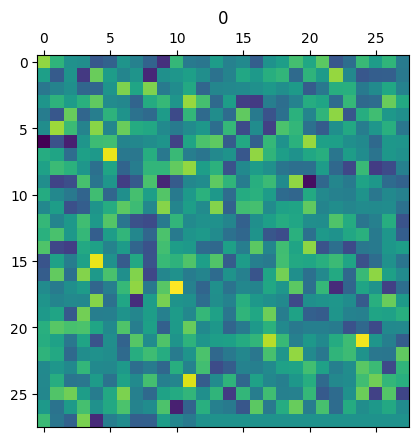

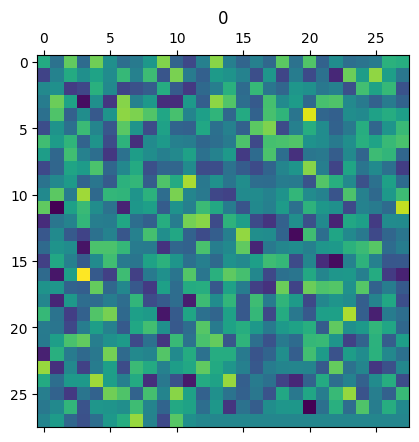

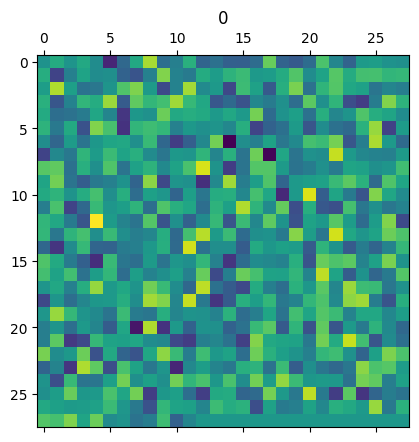

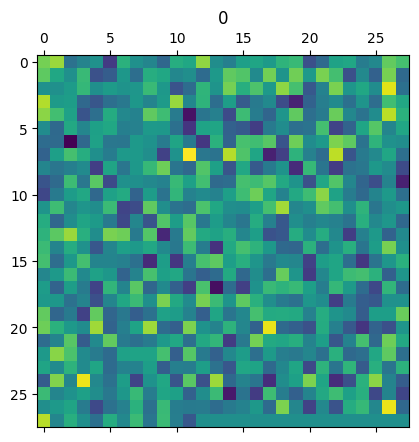

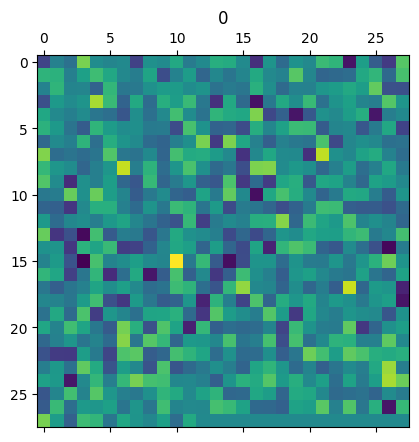

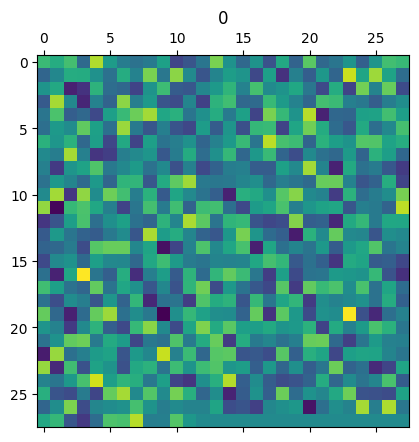

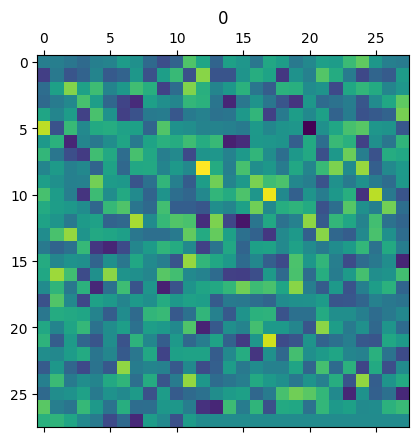

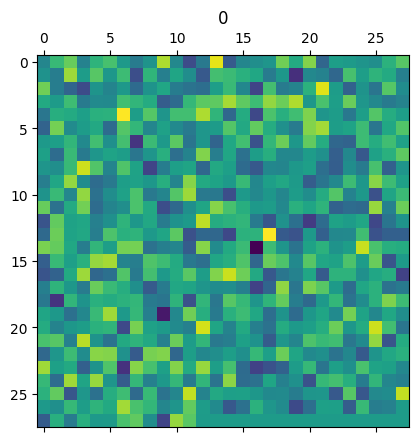

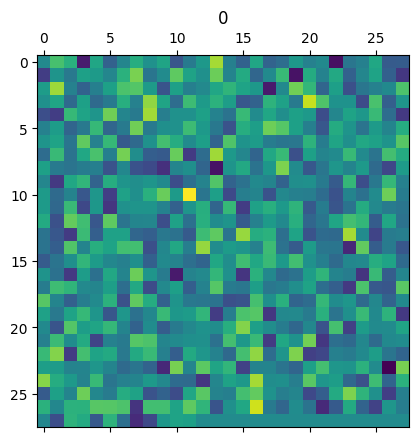

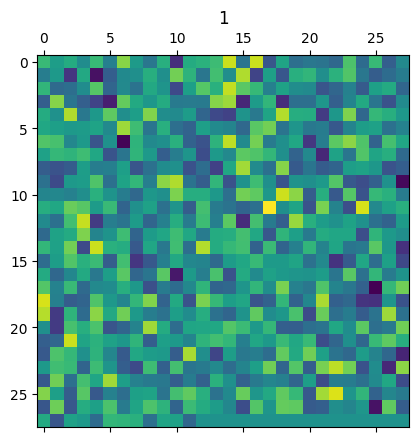

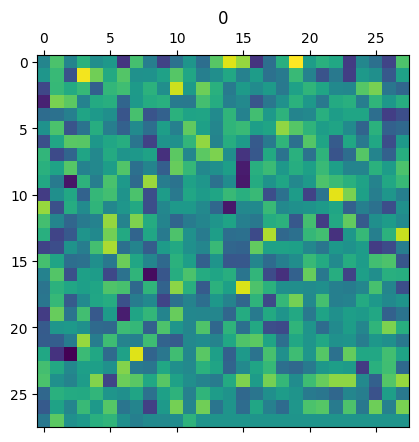

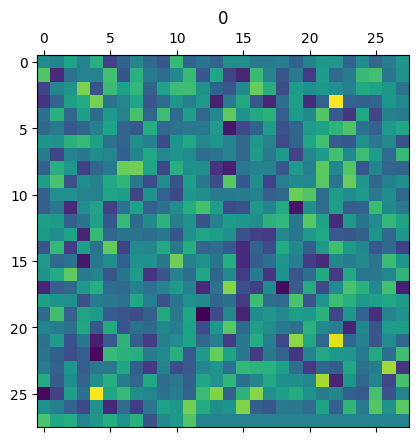

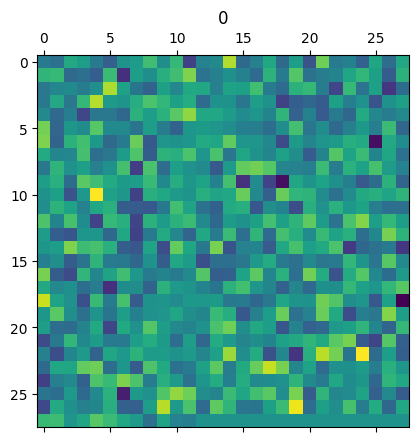

In [483]:
for i in range(30):
    plt.matshow(train_data[i])
    plt.title(train_labels[i])
    plt.show()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 28, 28, 8)         80        
                                                                 
 average_pooling2d_63 (Aver  (None, 14, 14, 8)         0         
 agePooling2D)                                                   
                                                                 
 conv2d_65 (Conv2D)          (None, 14, 14, 16)        1168      
                                                                 
 average_pooling2d_64 (Aver  (None, 7, 7, 16)          0         
 agePooling2D)                                                   
                                                                 
 conv2d_66 (Conv2D)          (None, 7, 7, 32)          4640      
                                                                 
 average_pooling2d_65 (Aver  (None, 3, 3, 32)        

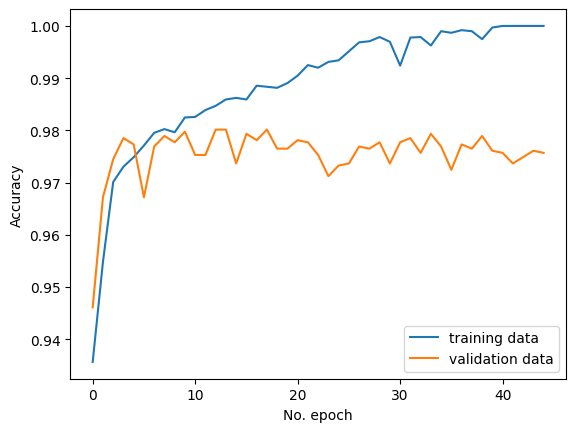

In [484]:
 model_trainning_saving([28,28],45,"tape_only_model",train_data,train_labels,test_data,test_labels)

### Geotop of TAPE

In [681]:
dgms = gdr.DiagramSelector(use=True, point_type='finite').fit_transform(embedding_geotop)

In [682]:
#15*15
dim = 225
result = concat_embedding_geotop(dgms,dim)

In [683]:
#splitting the dataset
num_samples = len(result)
num_train_samples = int(0.8 * num_samples)  # 80% for training, 20% for testing

# Split data and labels into training and testing sets
train_data, test_data = result[:num_train_samples], result[num_train_samples:]
train_labels, test_labels = result_signalp[:num_train_samples], result_signalp[num_train_samples:]

In [684]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [685]:
shape_unit=15
std_scale = preprocessing.StandardScaler().fit(train_data)
X_normalized = std_scale.transform(train_data)
train_data=np.reshape(X_normalized,(X_normalized.shape[0],shape_unit,shape_unit))

In [686]:
std_scale = preprocessing.StandardScaler().fit(test_data)
X_normalized = std_scale.transform(test_data)
test_data=np.reshape(X_normalized,(X_normalized.shape[0],shape_unit,shape_unit))

In [687]:
train_data = np.expand_dims(train_data, -1)
test_data = np.expand_dims(test_data, -1)

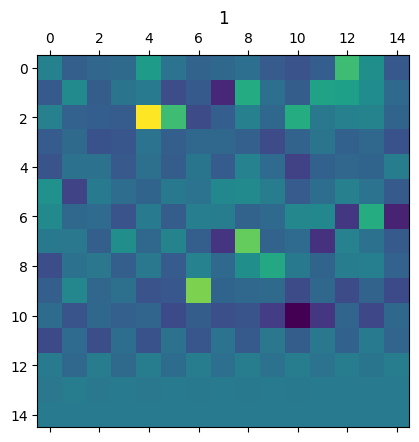

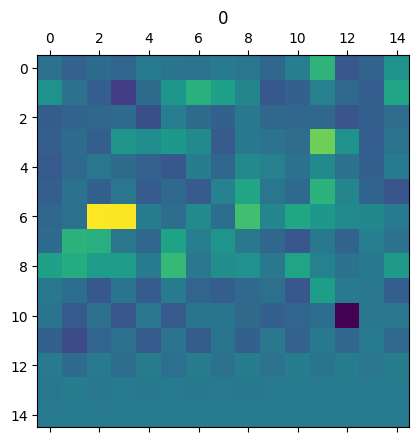

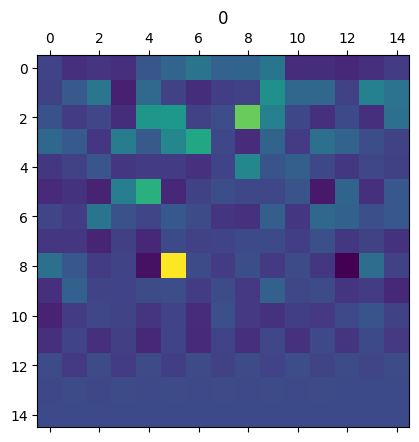

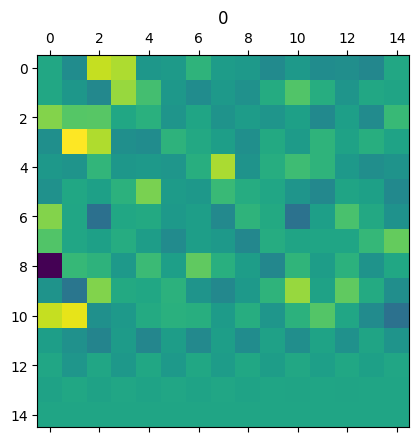

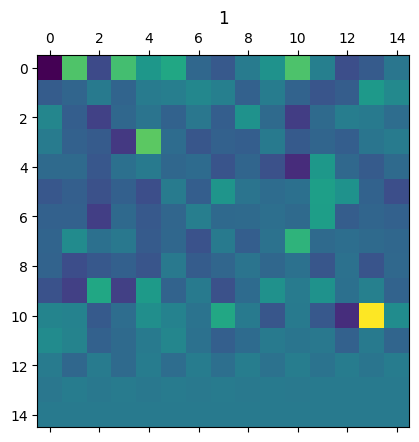

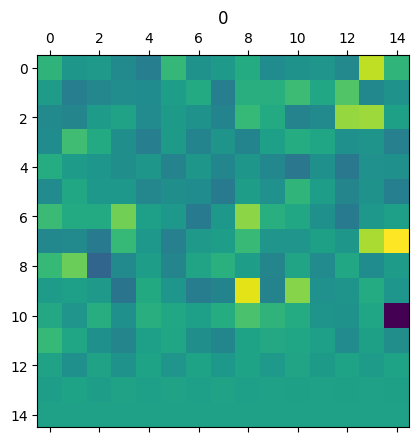

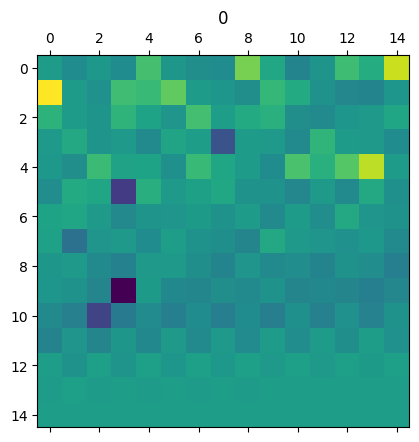

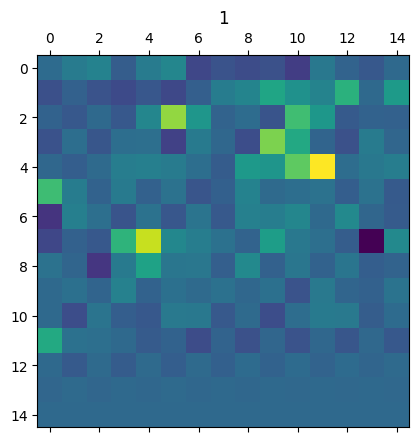

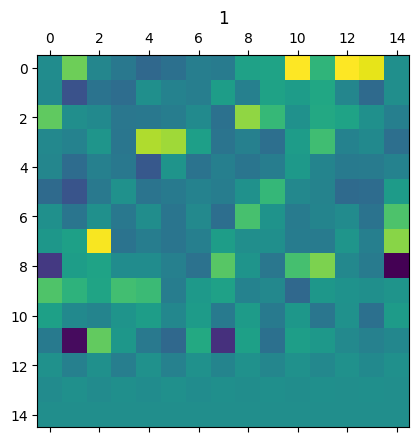

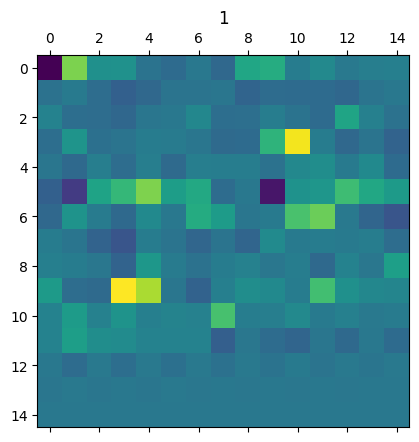

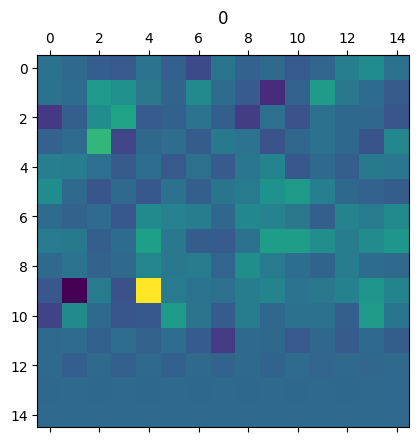

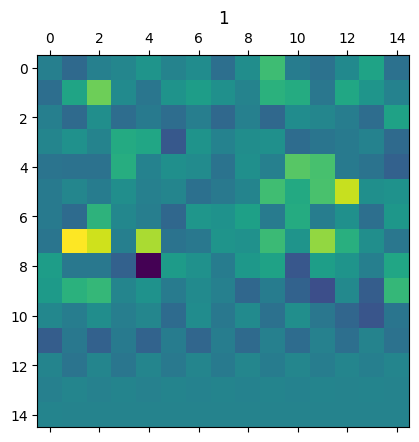

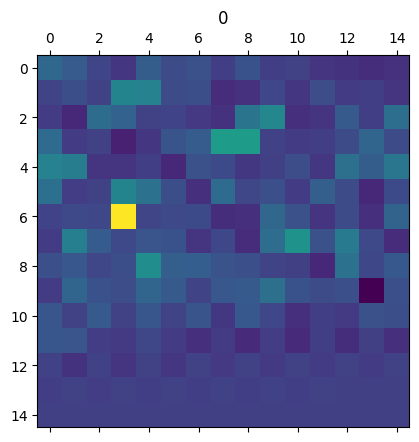

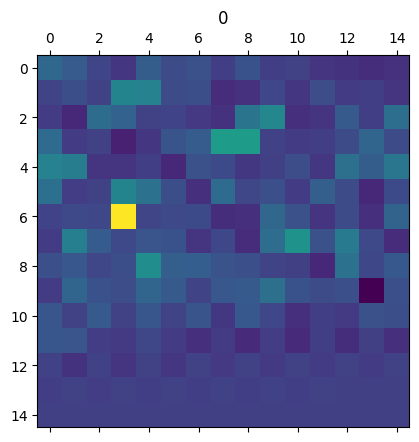

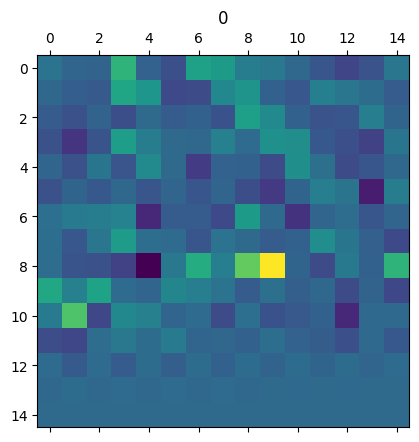

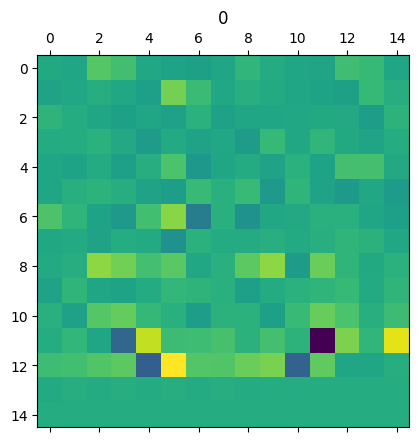

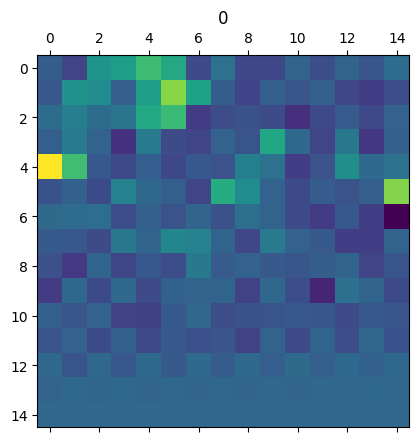

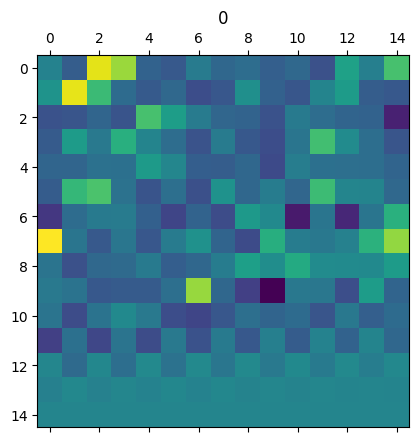

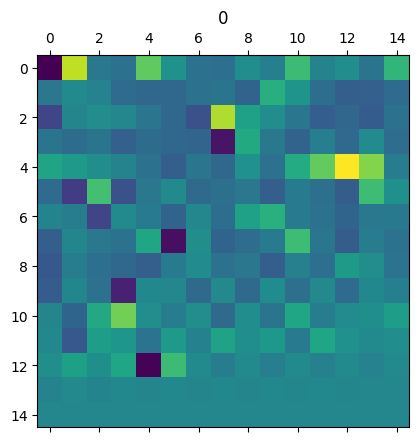

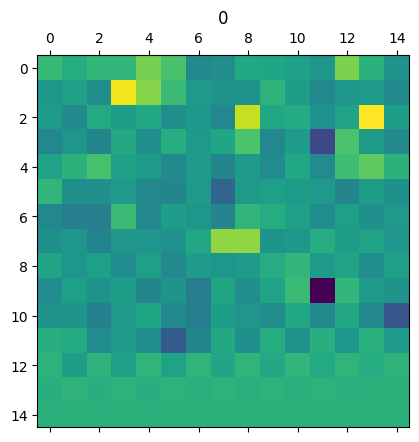

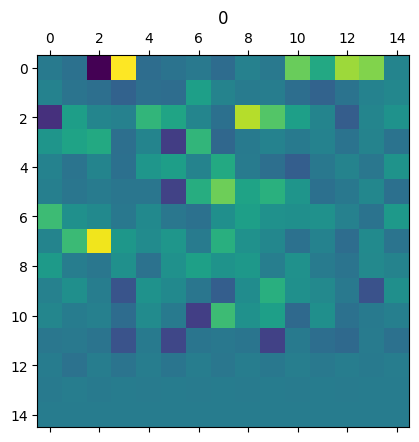

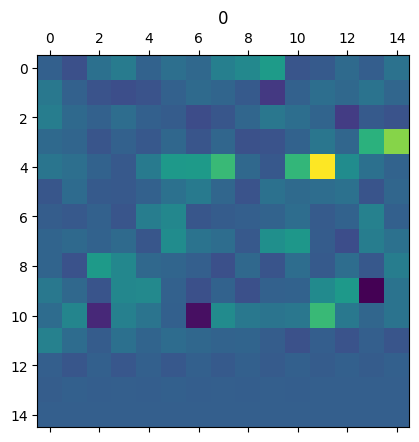

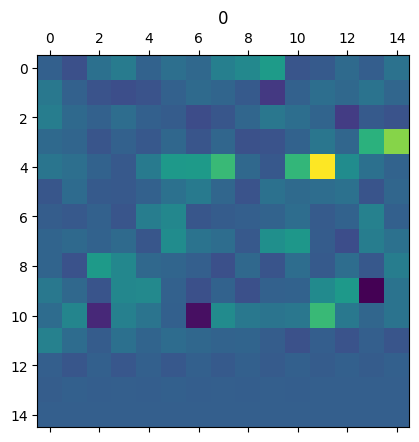

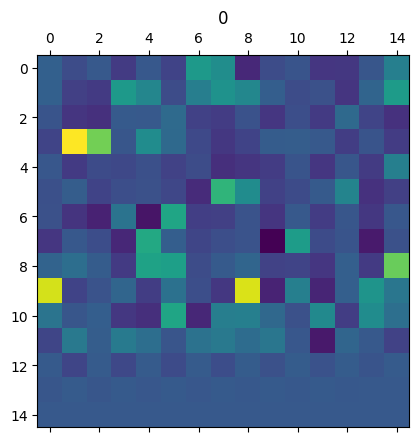

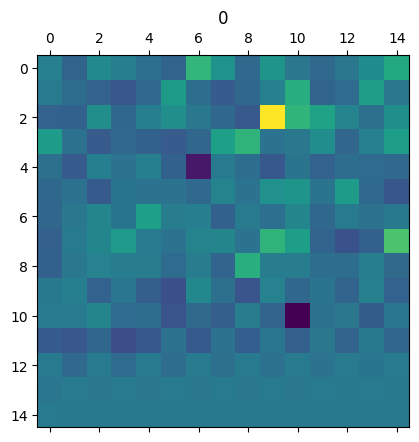

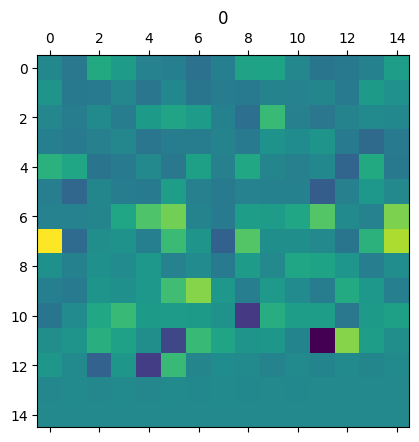

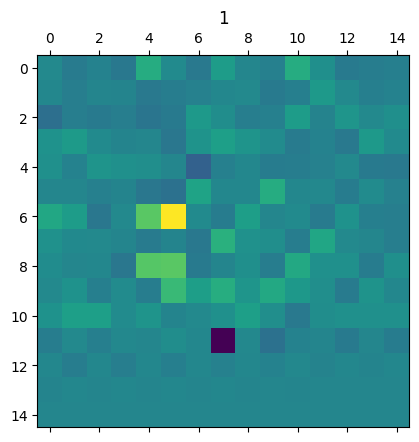

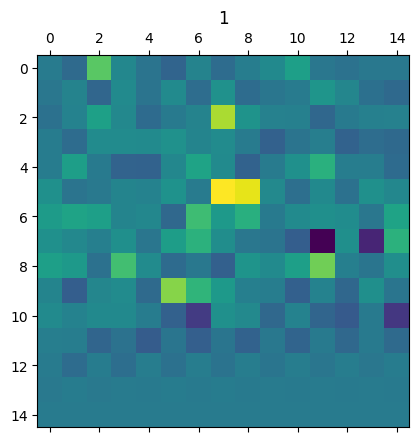

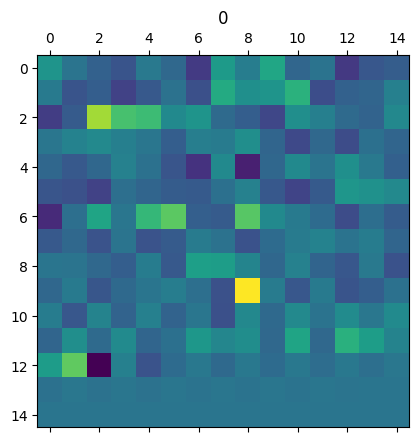

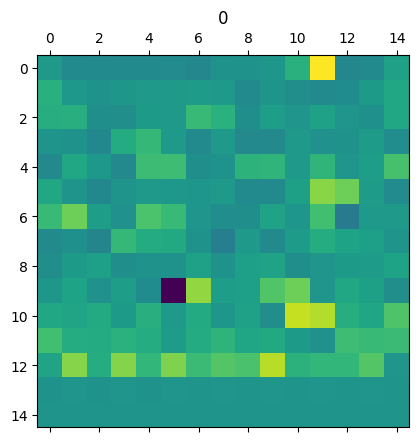

In [688]:
for i in range(30):
    plt.matshow(train_data[i])
    plt.title(train_labels[i])
    plt.show()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 15, 15, 8)         80        
                                                                 
 average_pooling2d_42 (Aver  (None, 7, 7, 8)           0         
 agePooling2D)                                                   
                                                                 
 conv2d_43 (Conv2D)          (None, 7, 7, 16)          1168      
                                                                 
 average_pooling2d_43 (Aver  (None, 3, 3, 16)          0         
 agePooling2D)                                                   
                                                                 
 conv2d_44 (Conv2D)          (None, 3, 3, 32)          4640      
                                                                 
 average_pooling2d_44 (Aver  (None, 1, 1, 32)        

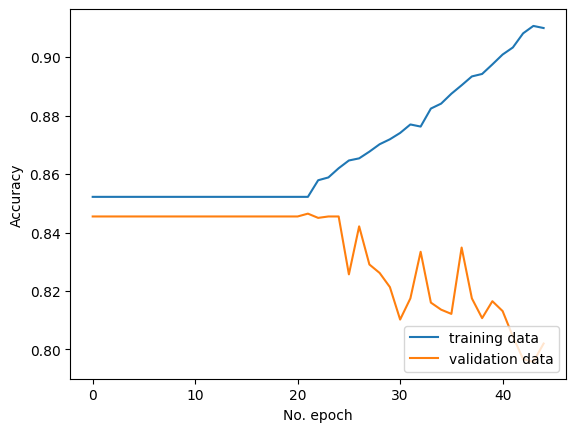

C:\Users\Kelly Larissa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [689]:
 model_trainning_saving([15,15],45,"geotop_of_tape_model",train_data,train_labels,test_data,test_labels)

### Geotop of ESM

In [507]:
dgms = gdr.DiagramSelector(use=True, point_type='finite').fit_transform(embedding2_geotop)

In [519]:
#19*19
dim = 361
result = concat_embedding_geotop(dgms,dim)

In [520]:
result = np.array(result)

In [515]:
shape_unit=19
result=np.reshape(result,(result.shape[0],shape_unit,shape_unit))

In [521]:
result.shape

(12337, 361)

In [522]:
#splitting the dataset
num_samples = len(result)
num_train_samples = int(0.8 * num_samples)  # 80% for training, 20% for testing

# Split data and labels into training and testing sets
train_data, test_data = result[:num_train_samples], result[num_train_samples:]
train_labels, test_labels = result_signalp[:num_train_samples], result_signalp[num_train_samples:]

In [523]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [524]:
shape_unit=19
std_scale = preprocessing.StandardScaler().fit(train_data)
X_normalized = std_scale.transform(train_data)
train_data=np.reshape(X_normalized,(X_normalized.shape[0],shape_unit,shape_unit))

In [525]:
std_scale = preprocessing.StandardScaler().fit(test_data)
X_normalized = std_scale.transform(test_data)
test_data=np.reshape(X_normalized,(X_normalized.shape[0],shape_unit,shape_unit))

In [526]:
train_data = np.expand_dims(train_data, -1)
test_data = np.expand_dims(test_data, -1)

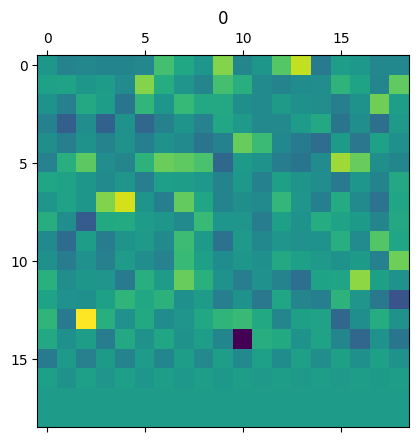

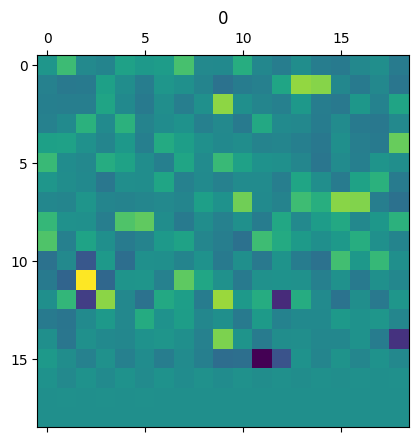

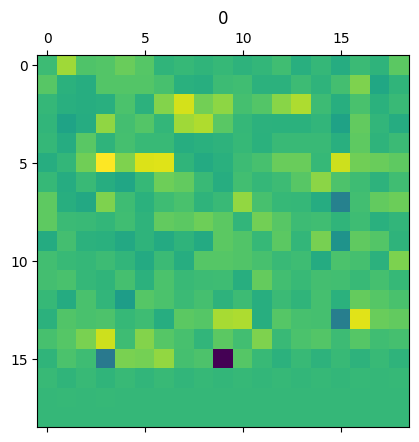

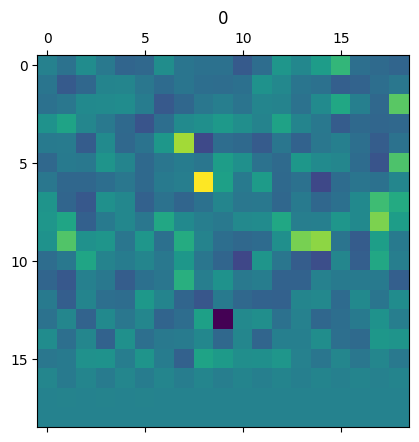

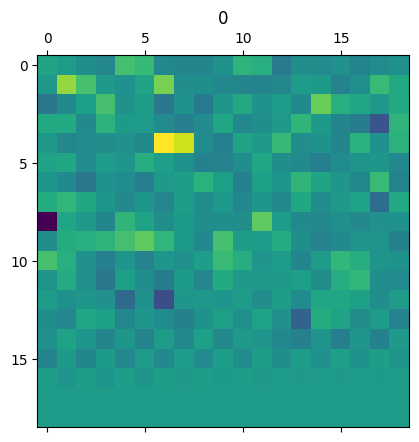

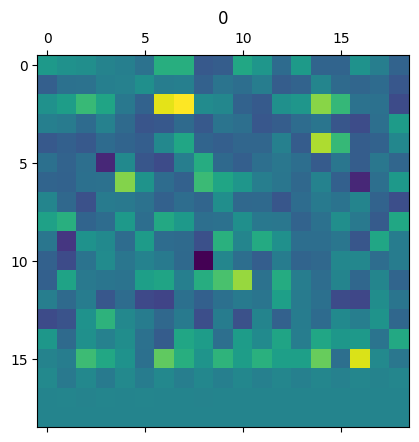

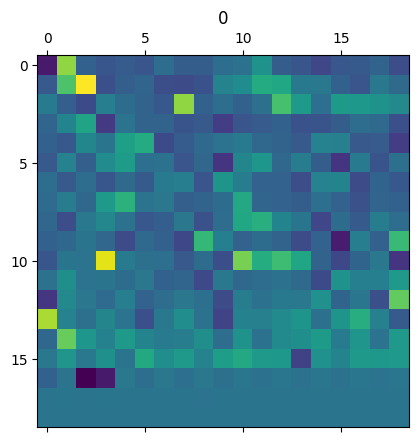

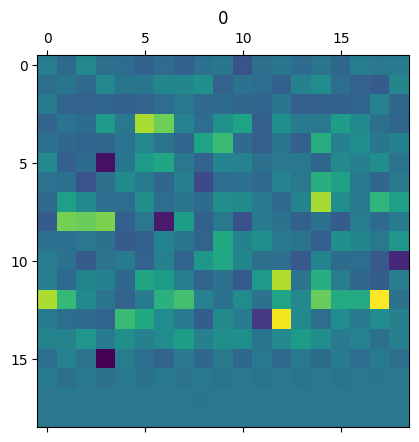

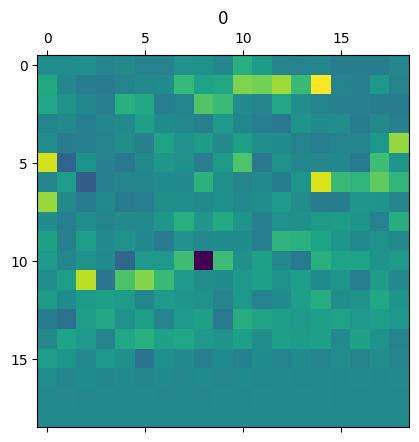

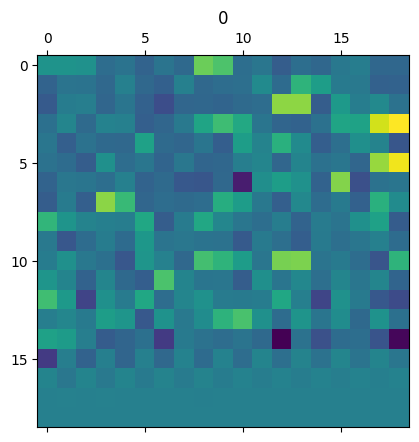

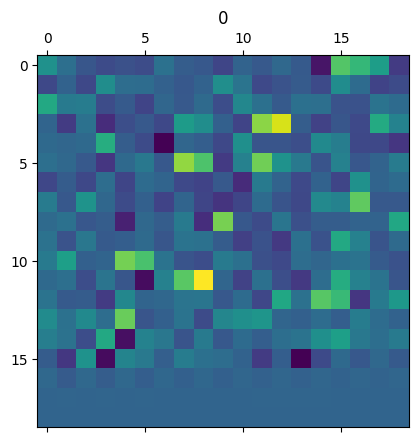

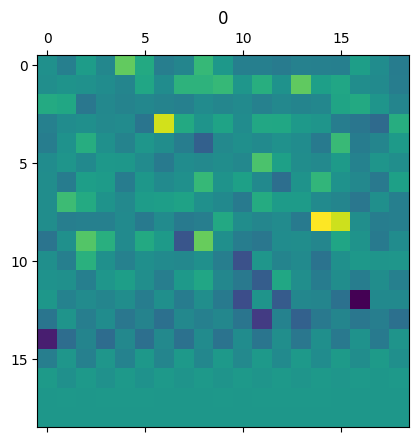

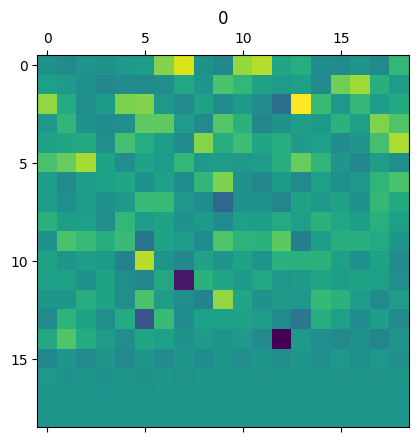

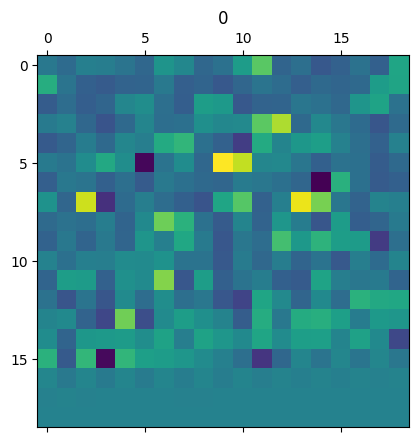

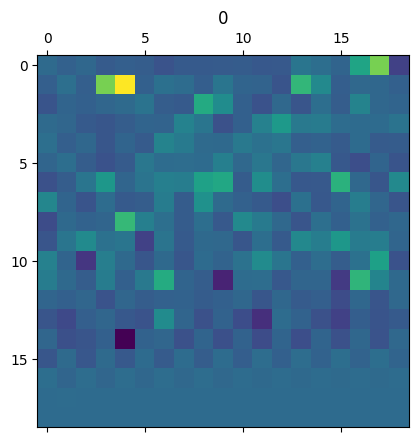

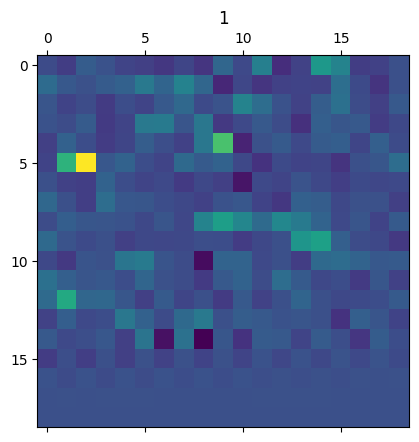

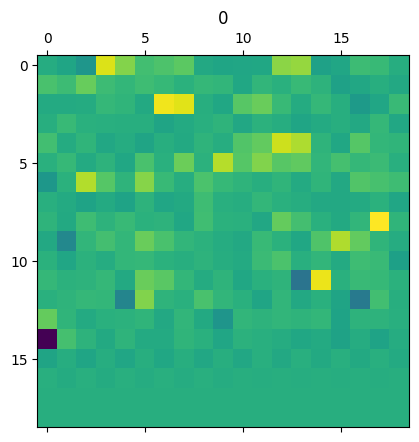

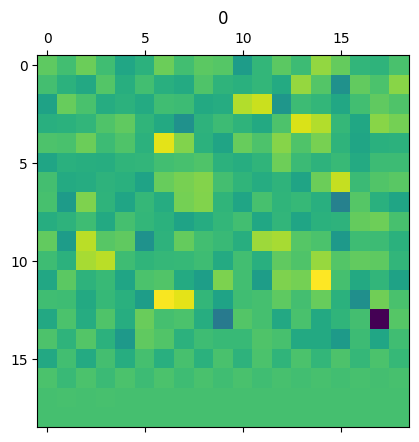

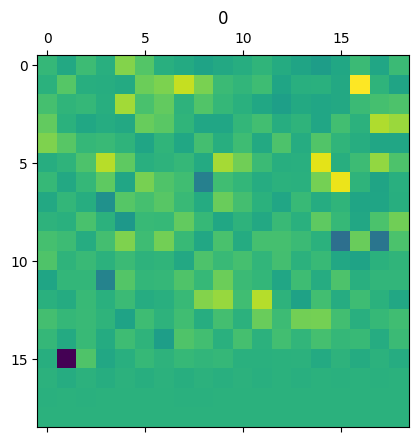

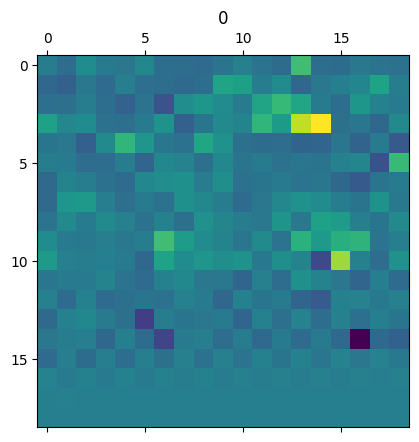

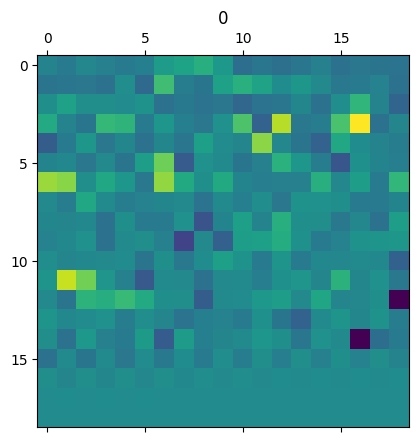

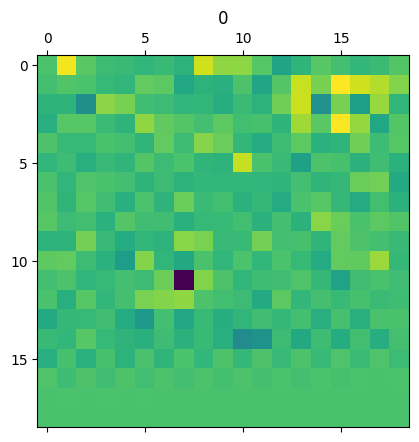

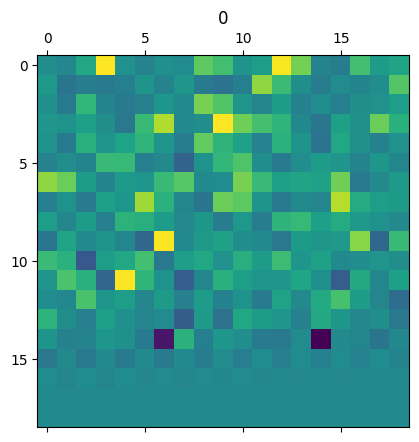

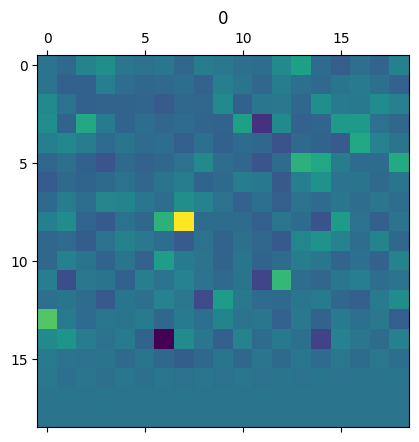

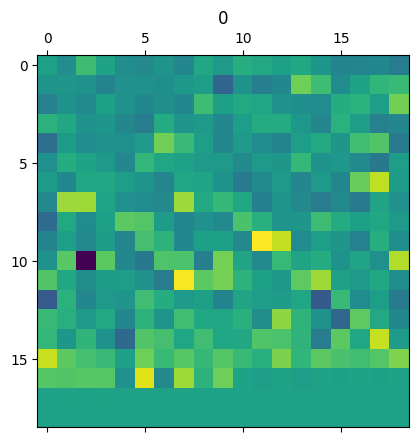

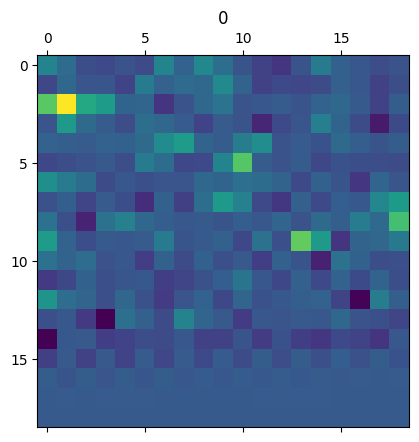

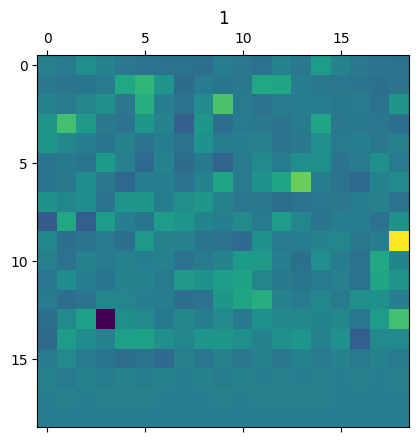

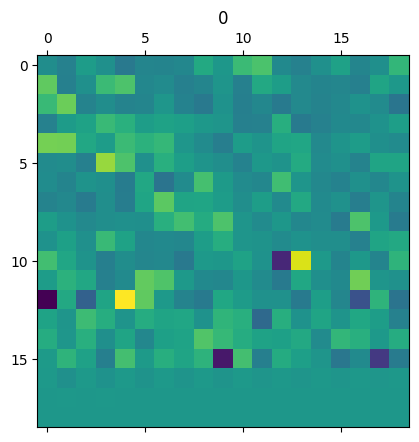

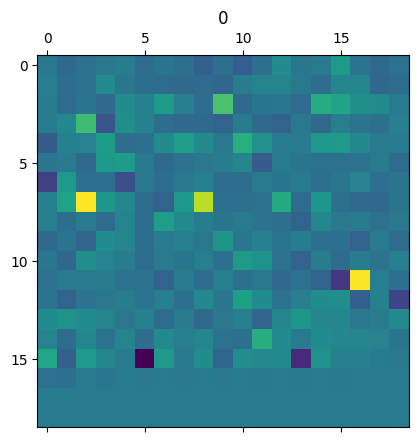

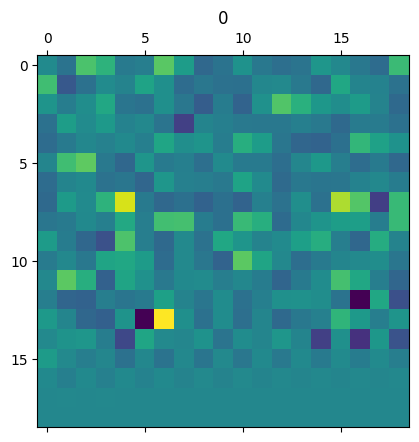

In [527]:
for i in range(30):
    plt.matshow(train_data[i])
    plt.title(train_labels[i])
    plt.show()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, 19, 19, 8)         80        
                                                                 
 average_pooling2d_69 (Aver  (None, 9, 9, 8)           0         
 agePooling2D)                                                   
                                                                 
 conv2d_71 (Conv2D)          (None, 9, 9, 16)          1168      
                                                                 
 average_pooling2d_70 (Aver  (None, 4, 4, 16)          0         
 agePooling2D)                                                   
                                                                 
 conv2d_72 (Conv2D)          (None, 4, 4, 32)          4640      
                                                                 
 average_pooling2d_71 (Aver  (None, 2, 2, 32)        

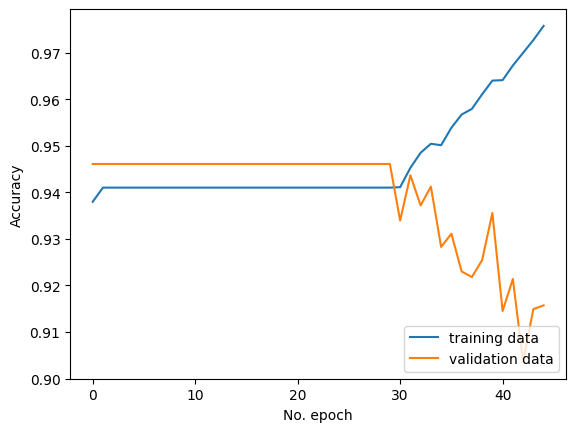

In [531]:
 model_trainning_saving([19,19],45,"geotop_of_esm_model",train_data,train_labels,test_data,test_labels)

### Classification

In [706]:
# tape_geotope_result
shape_unit=32

In [711]:
new_data = np.array(tape_geotope_result)

In [712]:
new_data=np.reshape(tape_geotope_result,(new_data.shape[0],shape_unit,shape_unit))

In [713]:
# new_data = np.expand_dims(new_data, -1)

In [714]:
new_data.shape

(10352, 32, 32)

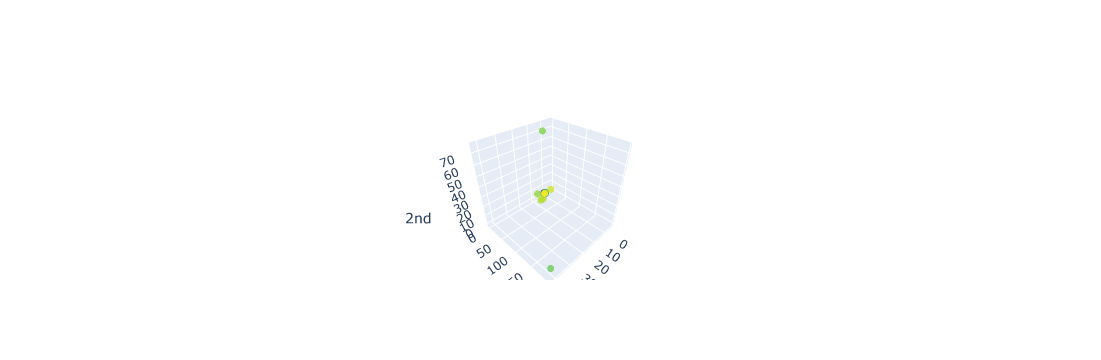

In [715]:
from gtda.plotting import plot_point_cloud

plot_point_cloud(new_data[0])

In [726]:
from gtda.homology import VietorisRipsPersistence

# Track connected components, loops, and voids
homology_dimensions = [0]

# Collapse edges to speed up H2 persistence calculation!
persistence = VietorisRipsPersistence(
    metric="euclidean",
    homology_dimensions=homology_dimensions,
    n_jobs=6,
    collapse_edges=True,
)

persistence_diagrams = persistence.fit_transform(new_data)

C:\Users\Kelly Larissa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\gtda\homology\simplicial.py:232: DataDimensionalityWarning:

Input array X has X.shape[1] == X.shape[2]. This is consistent with a collection of distance/adjacency matrices, but the input is being treated as a collection of vectors in Euclidean space.

C:\Users\Kelly Larissa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\gtda\homology\simplicial.py:299: DataDimensionalityWarning:

Input array X has X.shape[1] == X.shape[2]. This is consistent with a collection of distance/adjacency matrices, but the input is being treated as a collection of vectors in Euclidean space.



In [811]:
np.save("persitanece_data.npy",persistence_diagrams)

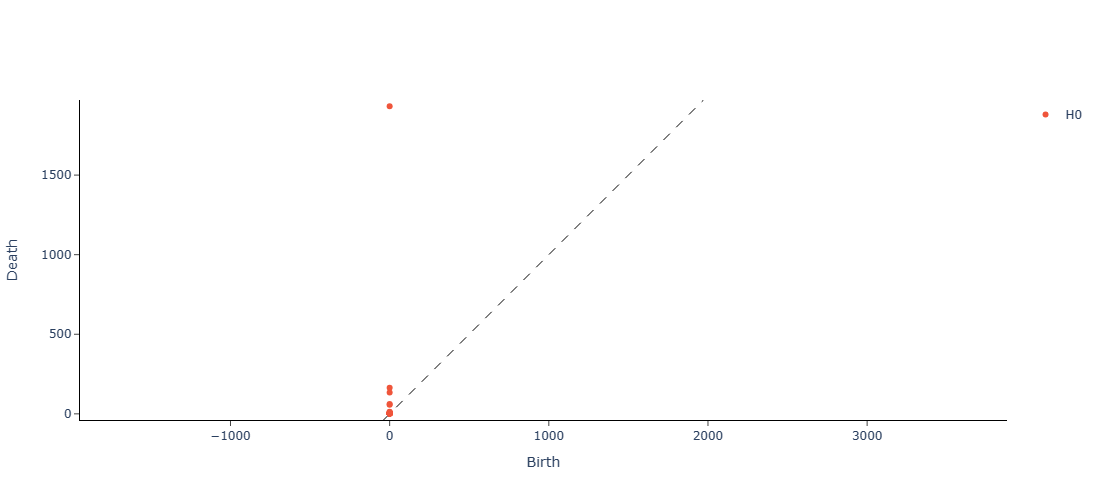

In [800]:
from gtda.plotting import plot_diagram
from scipy.stats import wasserstein_distance

# Circle
plot_diagram(persistence_diagrams[3])

In [797]:
persistence_diagrams[0][:,1]

array([  1.94519091,   2.27888155,   2.35890555,   2.48873019,
         2.51662779,   2.53647494,   2.5922668 ,   2.59801912,
         2.60665607,   2.77797818,   2.8771534 ,   2.91897988,
         3.00832629,   3.02572966,   3.04923964,   3.10410523,
         3.11586356,   3.15069818,   3.34369707,   3.36339664,
         3.38772702,   3.41166067,   3.49841094,   6.1749773 ,
         9.84671497,  49.97418594,  79.16993713,  79.71282196,
       223.13806152, 554.61724854,   0.        ])

In [799]:
# Compute the Wasserstein distance between the two diagrams
distance = wasserstein_distance(persistence_diagrams[0][:,1], persistence_diagrams[1][:,1])

print("Wasserstein distance:", distance)


Wasserstein distance: 14.484336610763298


In [805]:
length = len(persistence_diagrams)

In [806]:
wessertein_dist = np.zeros(shape=(length, length))

In [807]:
for i in range(len(persistence_diagrams)):
    for j in range(len(persistence_diagrams)):
        wessertein_dist[i,j] = wasserstein_distance(persistence_diagrams[i][:,1], persistence_diagrams[j][:,1])

In [810]:
wessertein_dist.shape

(10352, 10352)

In [809]:
np.save("wesserstein_distance.npy", wessertein_dist)